# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.
1. Las calificaciónes promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciónes promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import math


In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2. Prepara los datos

1. Reemplaza los nombres de las columnas (ponlos en minúsculas).
2. Convierte los datos en los tipos necesarios.
3. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

4. Si es necesario, elige la manera de tratar los valores ausentes:
       1. Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
       
       2. ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
       
       3. Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.   
       
4. Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.


# Revisión nombre de columnas

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# Ausentes en el año de lanzamiento 

In [7]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

# Corregir tipos de datos

In [8]:
import numpy as np
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Revisión valores 'tbd'

In [9]:
games_2 = games.copy()
games.replace('tbd', np.nan, inplace= True)

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
games['user_score'] = games['user_score'].astype(float)

In [12]:
games_2['user_score'] = pd.to_numeric(games_2['user_score'], errors= 'coerce')

In [13]:
games_2.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

# Revisión Valores nulos / nan

In [14]:
100*games.isna().sum() / games.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [15]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
games.dropna(subset = ['name', 'genre'], inplace = True)

In [17]:
games.dropna(subset = ['year_of_release'], inplace = True)

In [18]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
games.groupby('platform')['year_of_release'].mean()

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.126953
DC      1999.942308
DS       2008.18529
GB      1995.958763
GBA     2003.210851
GC      2003.400369
GEN     1993.037037
GG           1992.0
N64     1998.531646
NES     1987.153061
NG           1994.5
PC      2008.914316
PCFX         1996.0
PS      1998.005882
PS2     2004.583921
PS3     2010.840735
PS4     2015.145408
PSP     2008.731769
PSV     2014.132867
SAT     1996.028902
SCD     1993.833333
SNES    1993.845188
TG16         1995.0
WS           2000.0
Wii     2008.966563
WiiU    2013.659864
X360    2009.880682
XB      2003.636364
XOne    2014.951417
Name: year_of_release, dtype: Float64

In [20]:
games.groupby('platform')['year_of_release'].median()

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: Float64

In [21]:
100 * games.isna().sum() / games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Analisis de Datos

Mira cuantos juegos fueron lanzados en diferentes años

In [23]:
sample_data = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016)]

In [24]:
grouped_sample = sample_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(grouped_sample)
                                                                                  

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


# Perfil de usuario

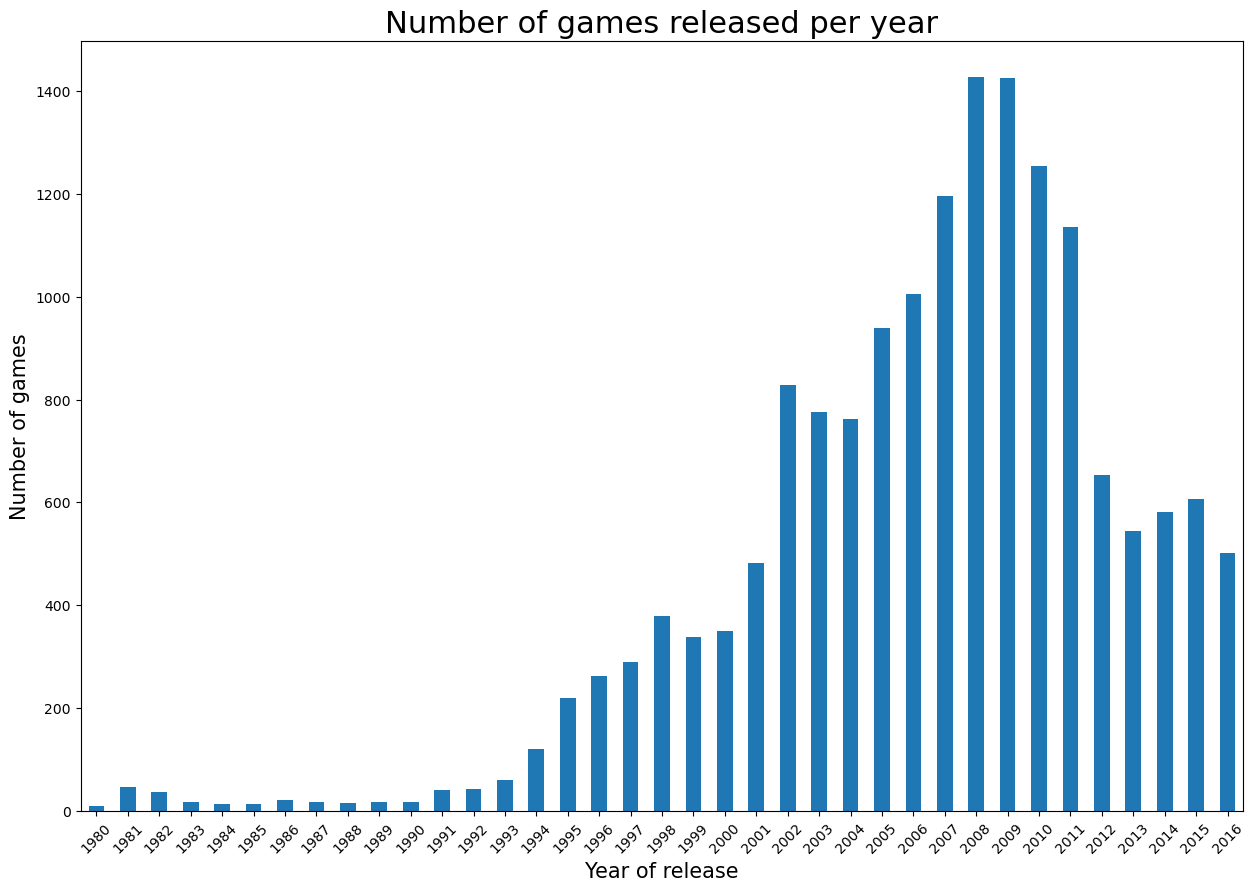

In [25]:
# Obtenga una tabla dinámica y dibuje un gráfico de barras
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,10))

plt.title('Number of games released per year', fontsize=22)
plt.xlabel('Year of release', fontsize=15)
plt.ylabel('Number of games',  fontsize=15)
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show()

In [26]:
# Cree una tabla dinámica que muestre las ventas globales totales para cada plataforma.
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


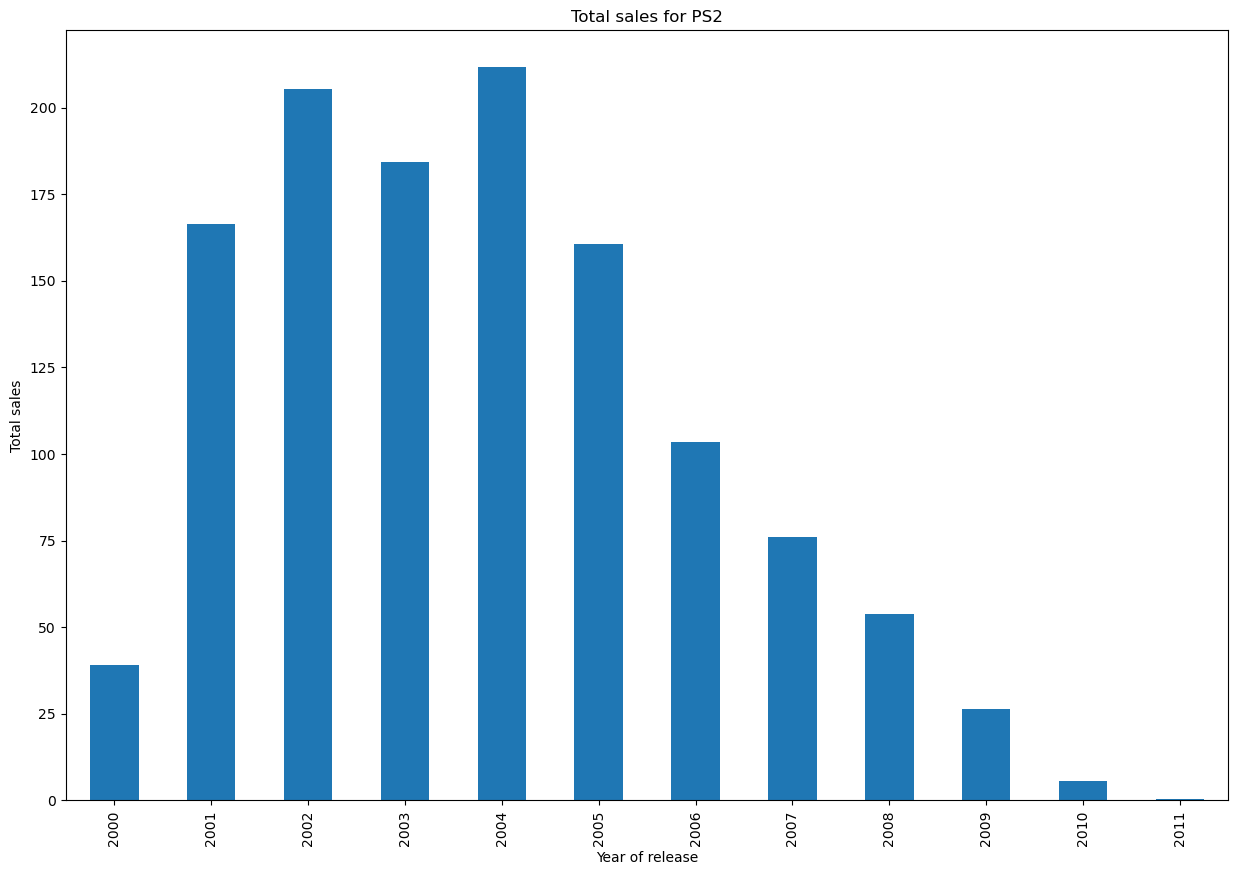

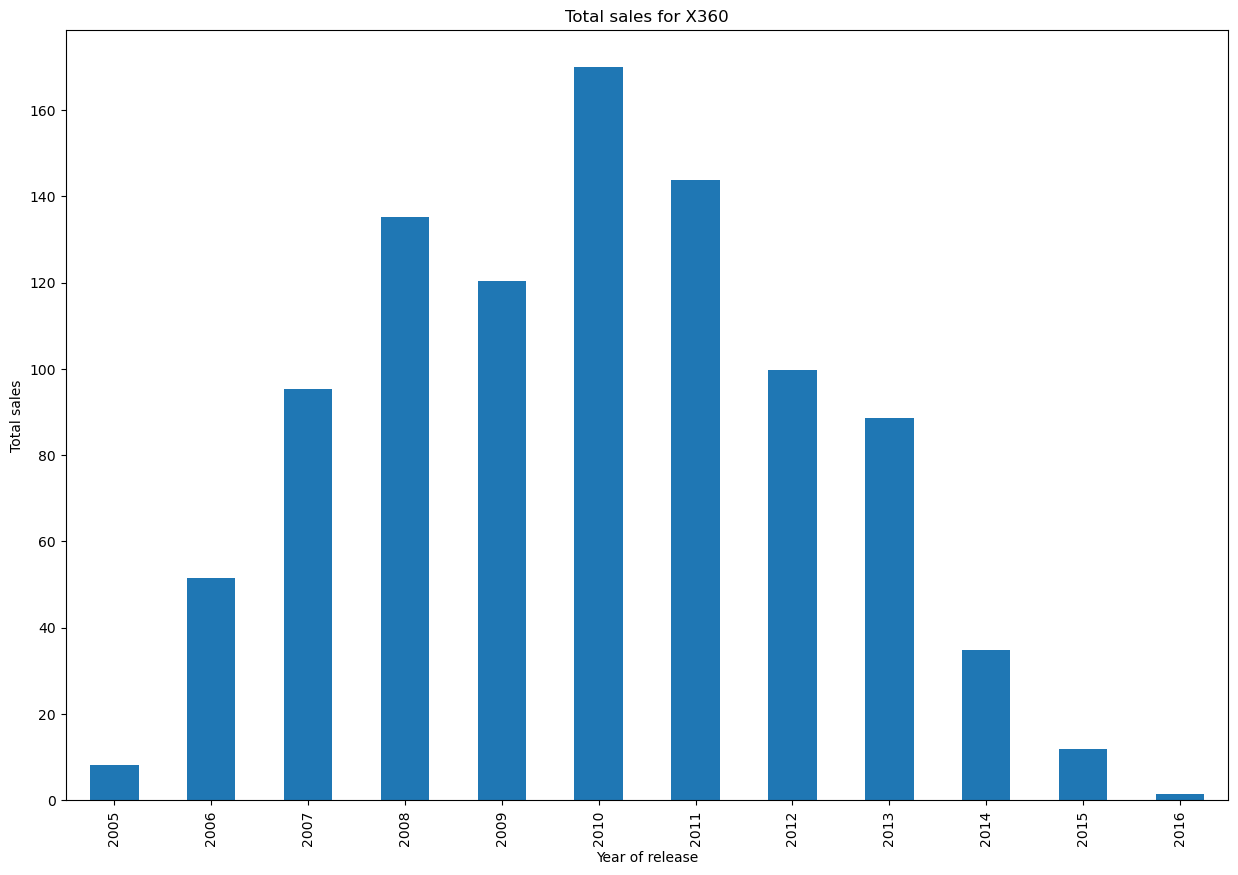

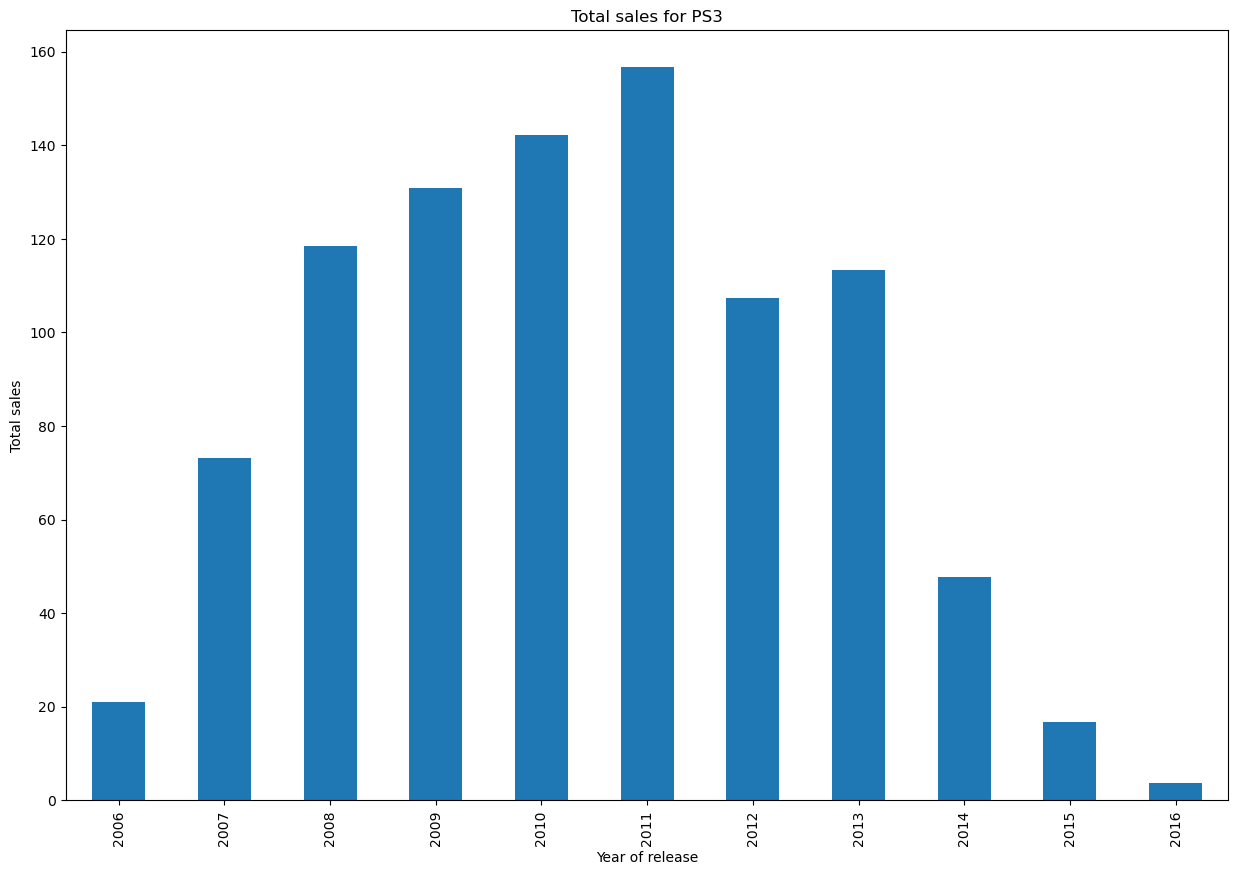

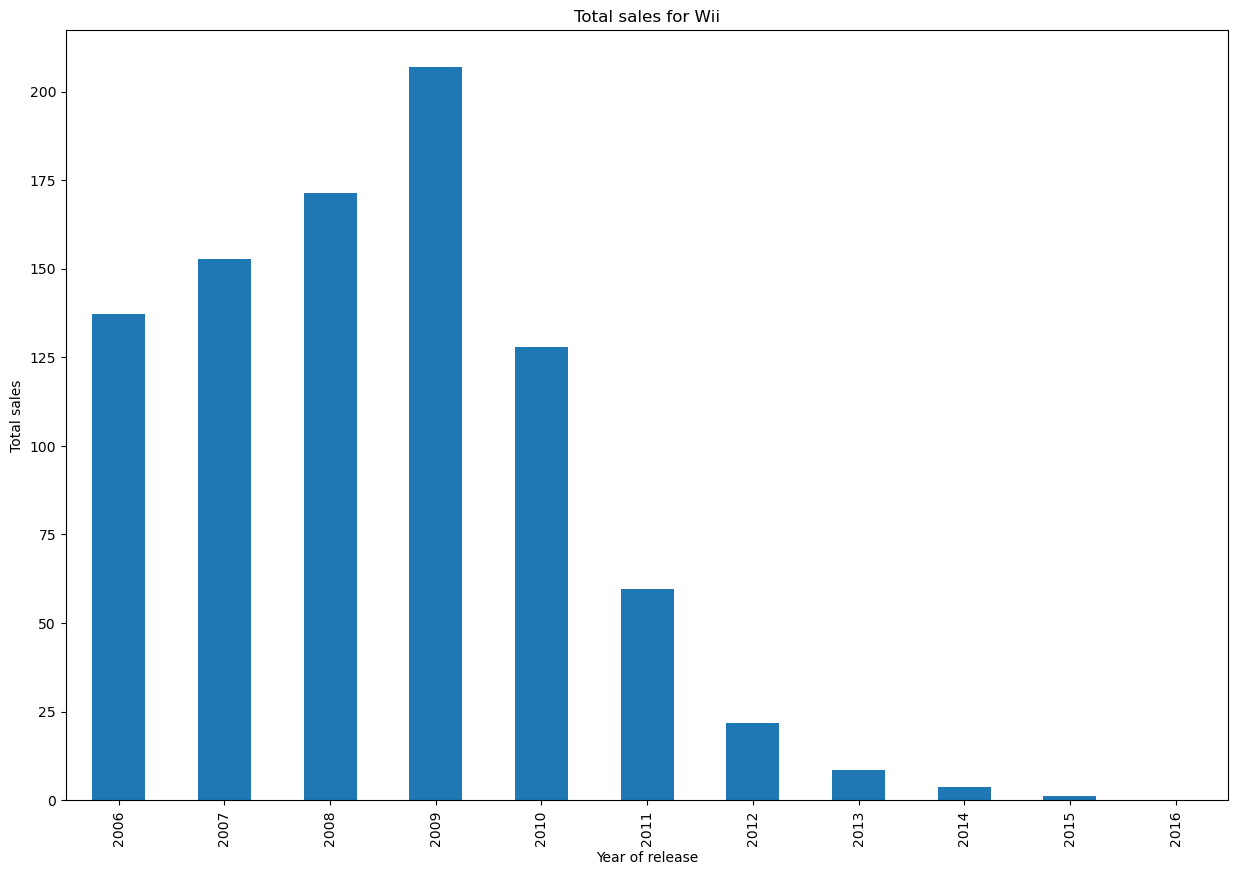

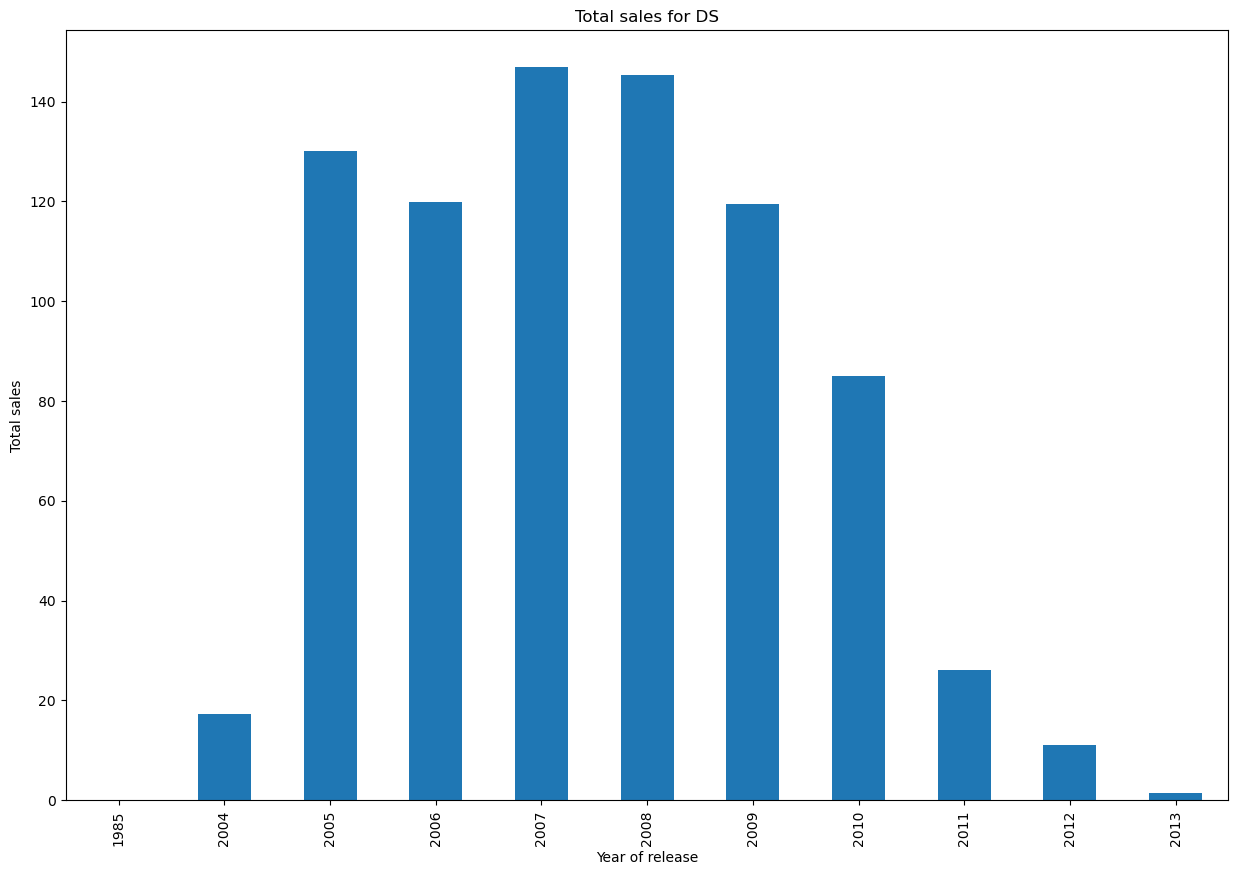

In [27]:
# Almacena las plataformas en una lista
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Recorre cada nombre de plataforma, obtén los datos y grafica las ventas totales por año
for platform in platforms:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.legend().set_visible(False)
    plt.show()

In [28]:
# Obtenga una porción de datos llamada 'sample_data' que contiene todas las filas con valores de año de lanzamiento entre 2014 y 2016
sample_data = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016)]

In [29]:
# Agrupe el segmento de datos por plataforma y luego encuentre el total global
grouped_sample = sample_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(grouped_sample)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


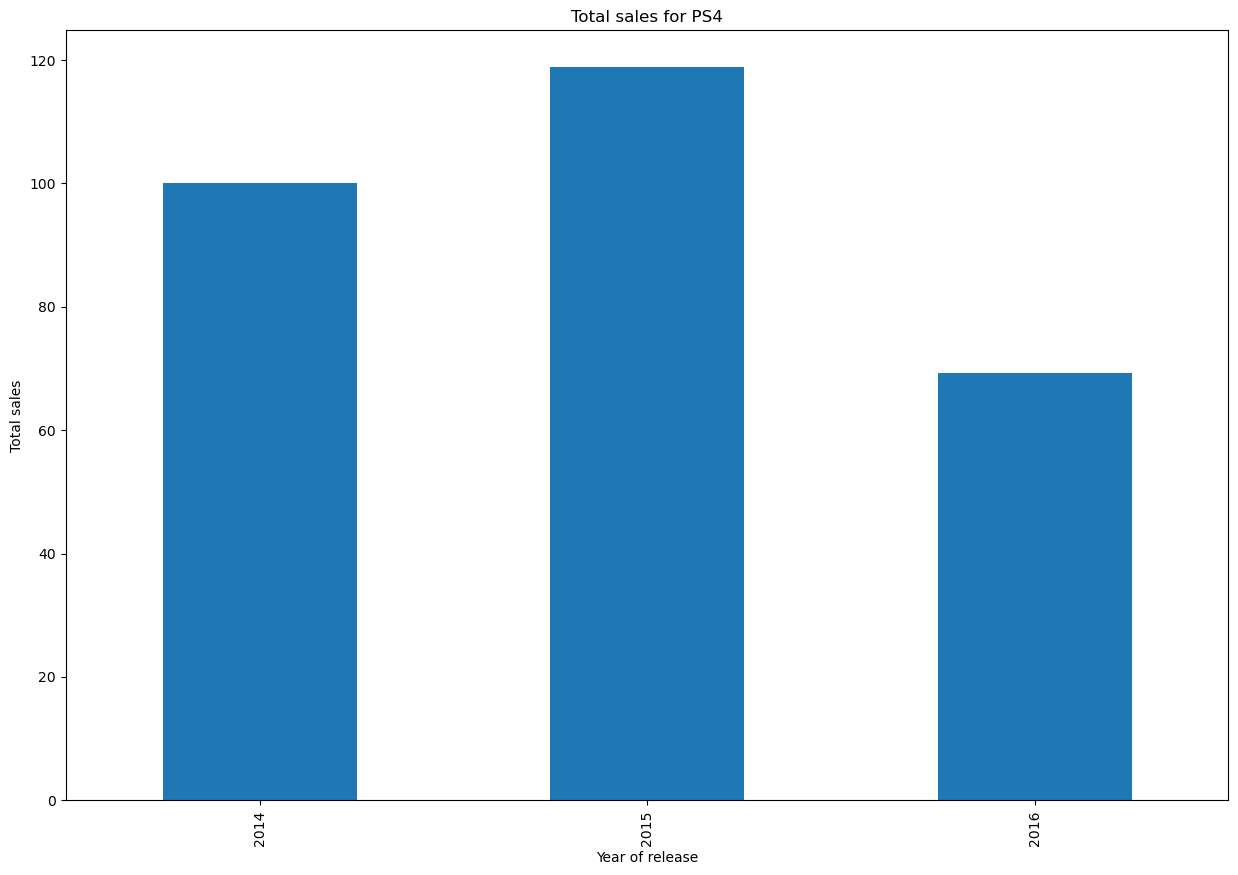

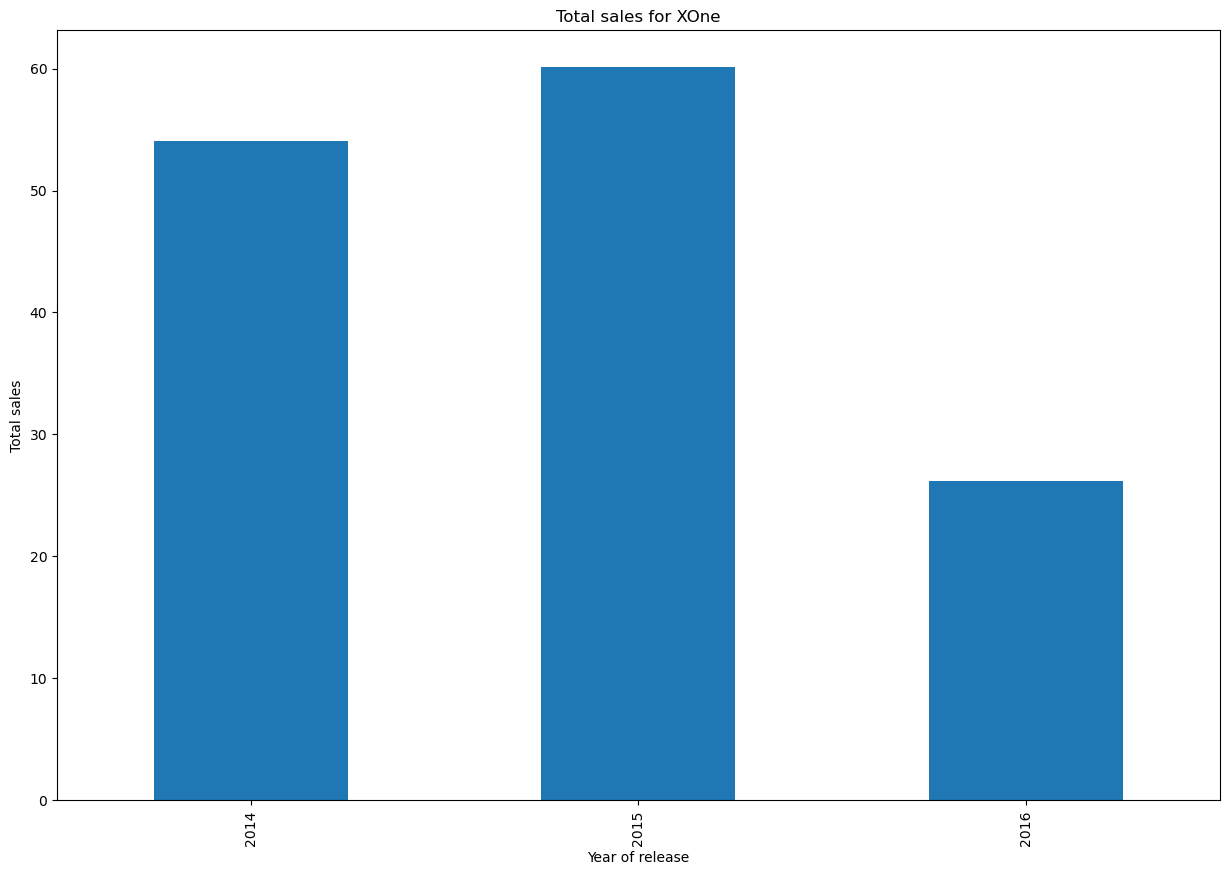

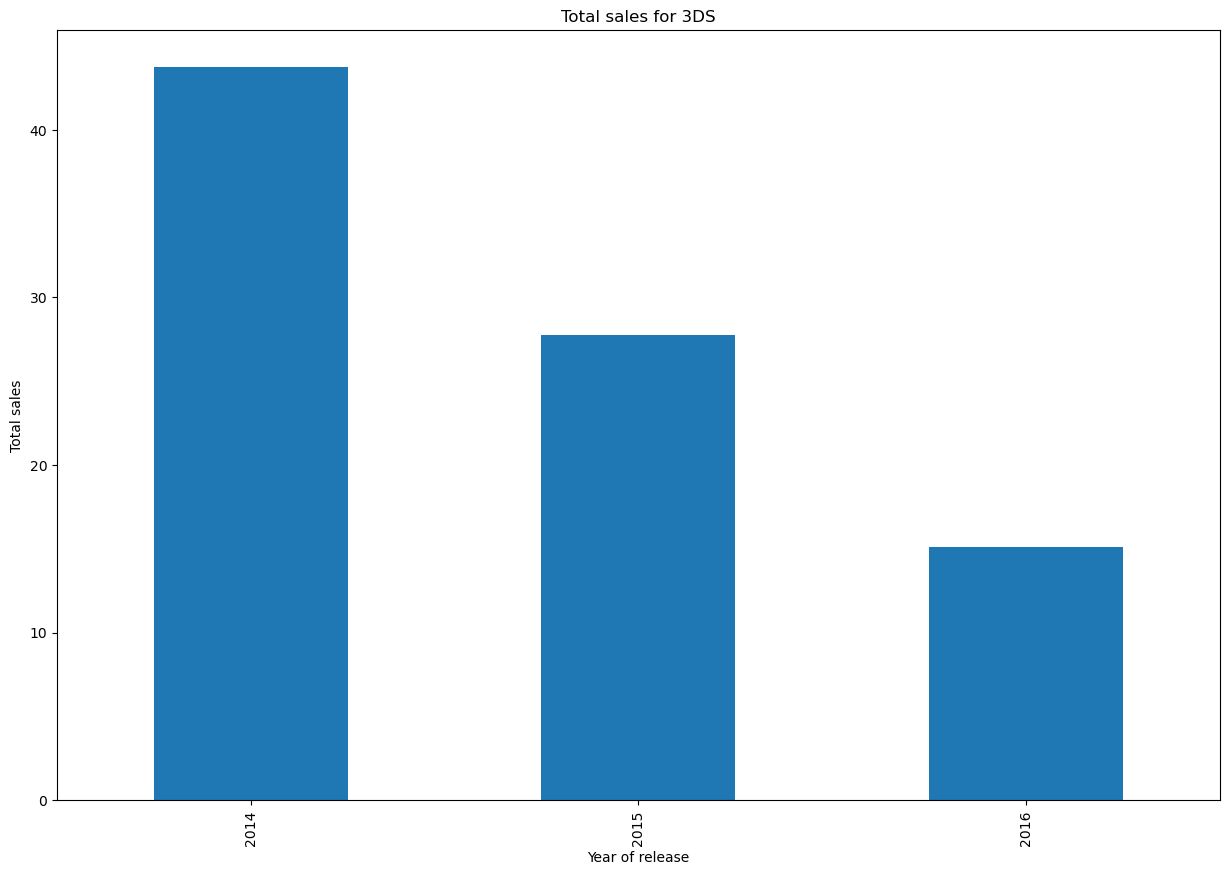

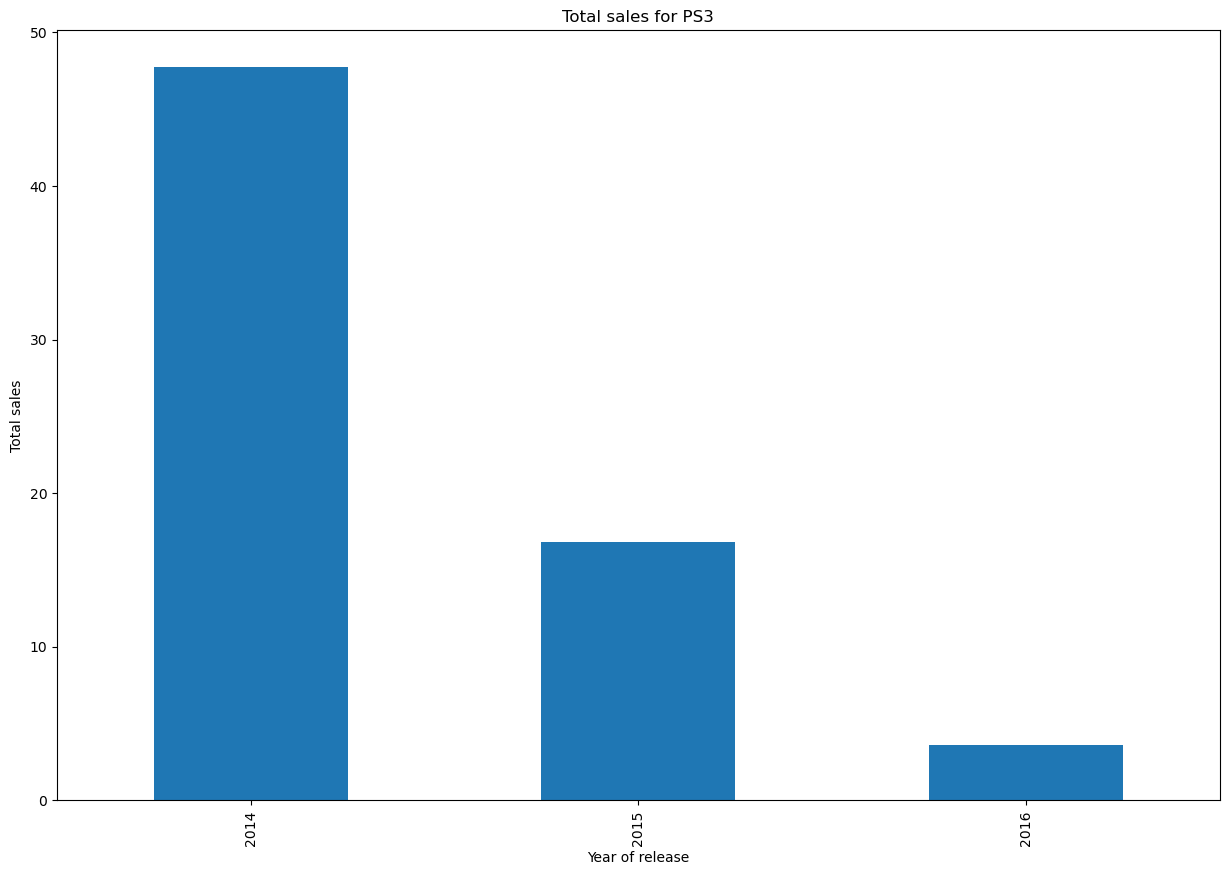

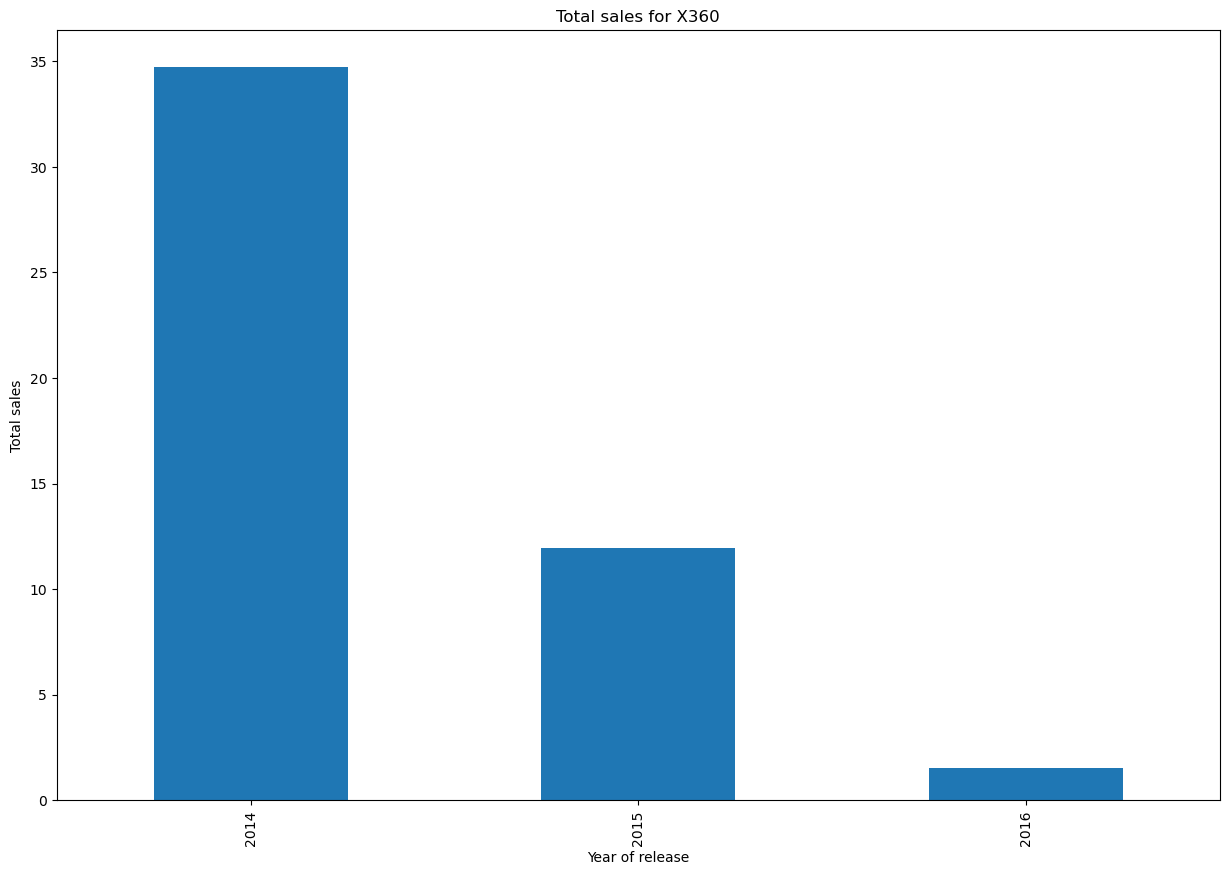

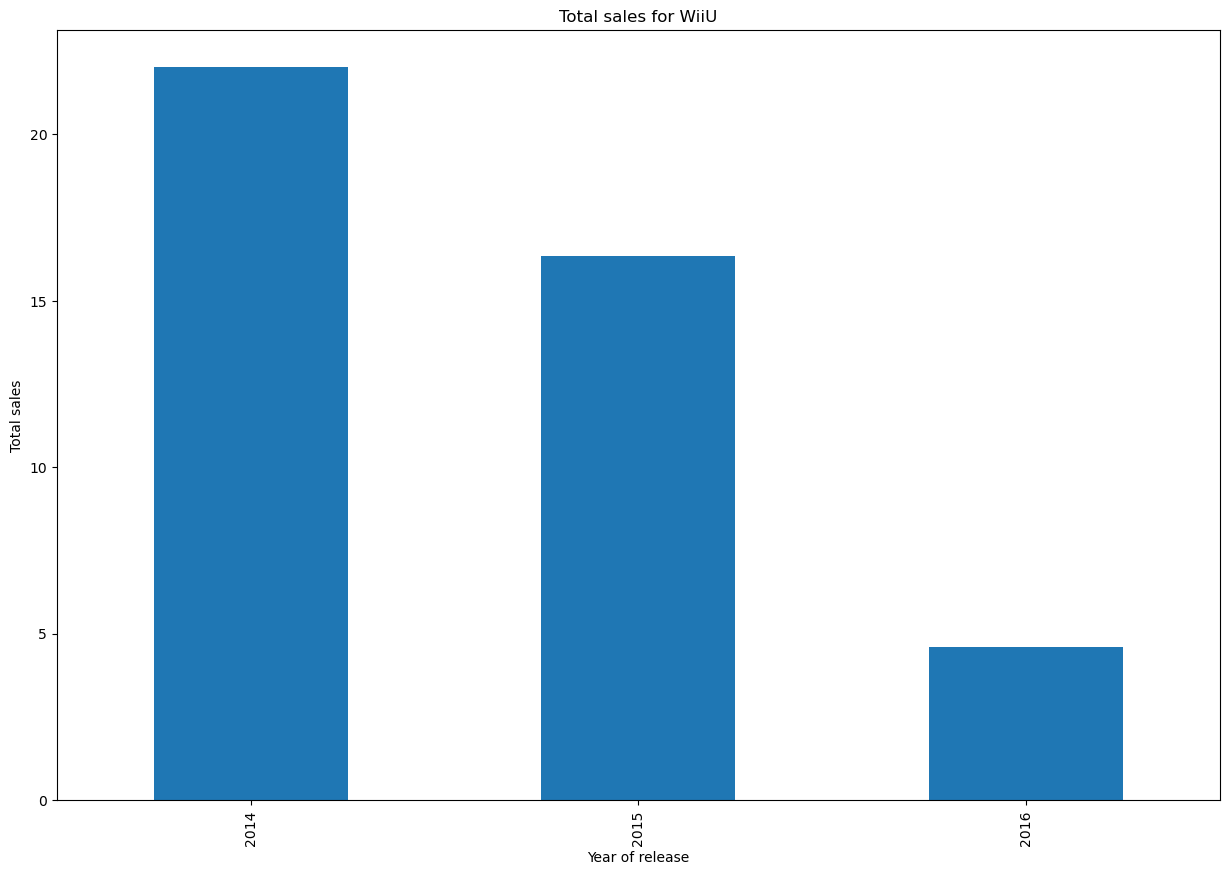

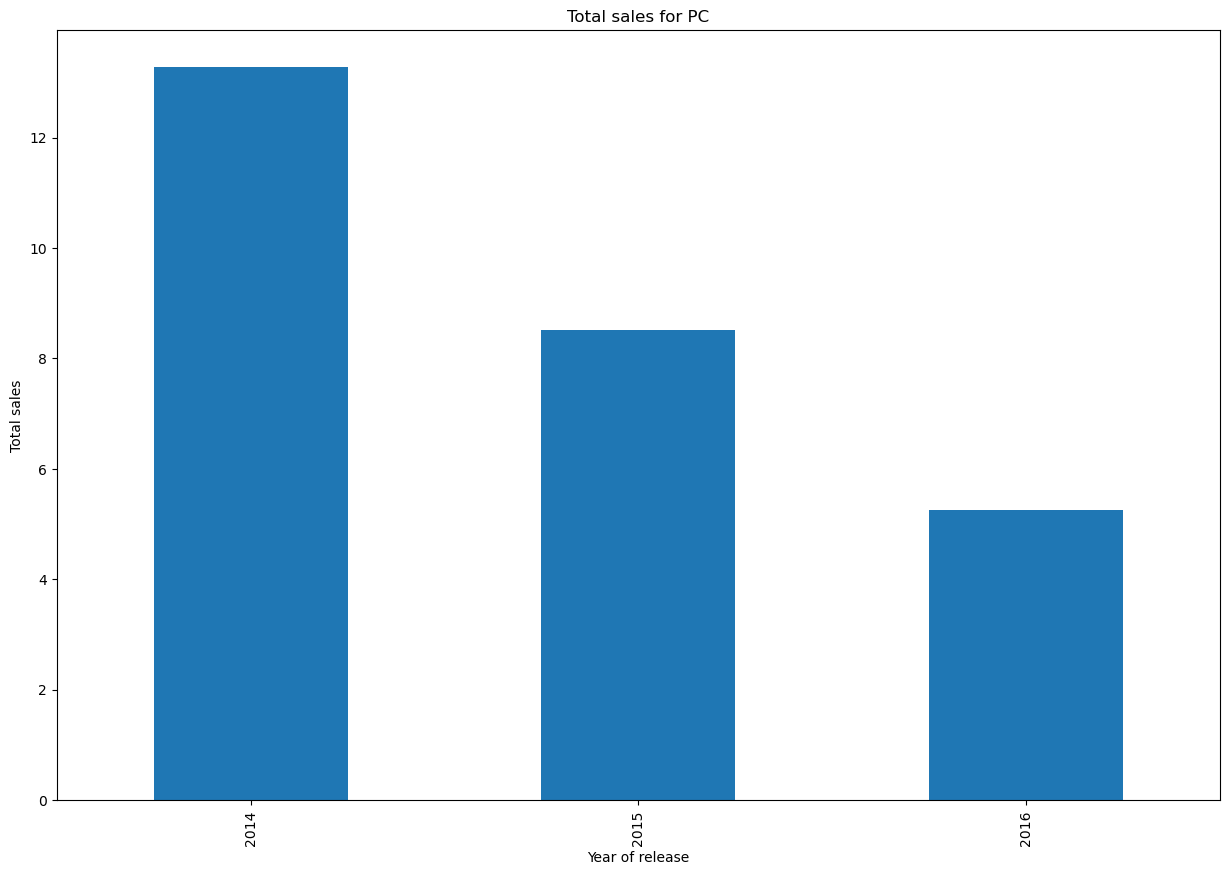

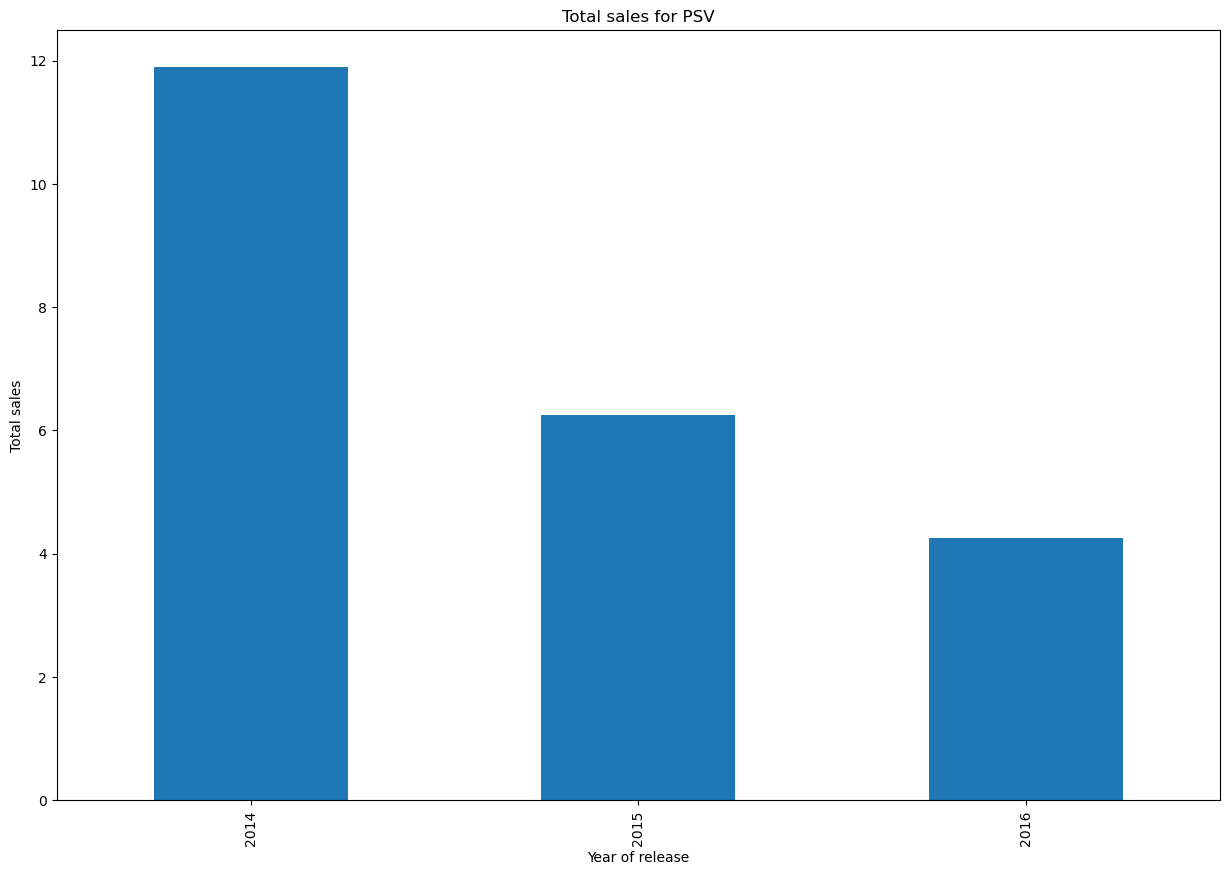

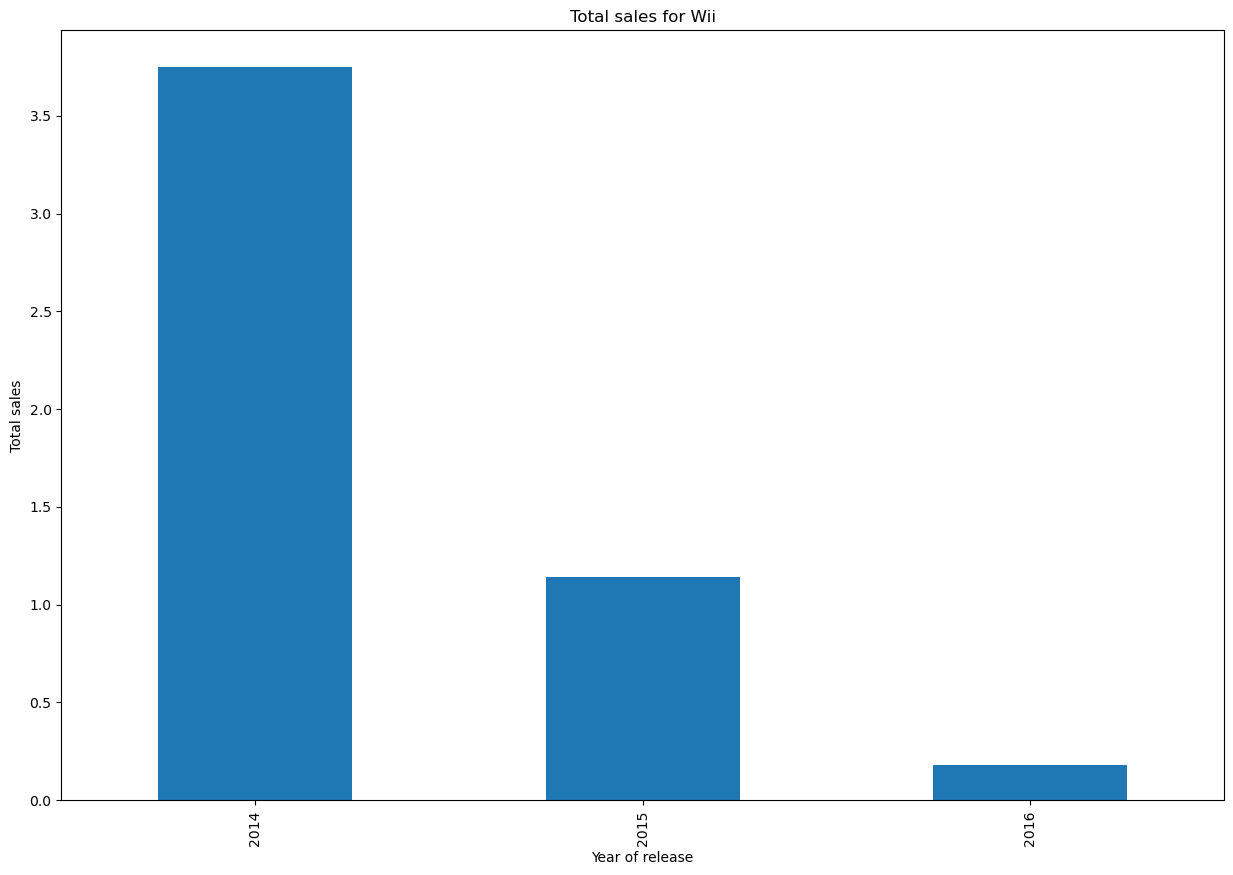

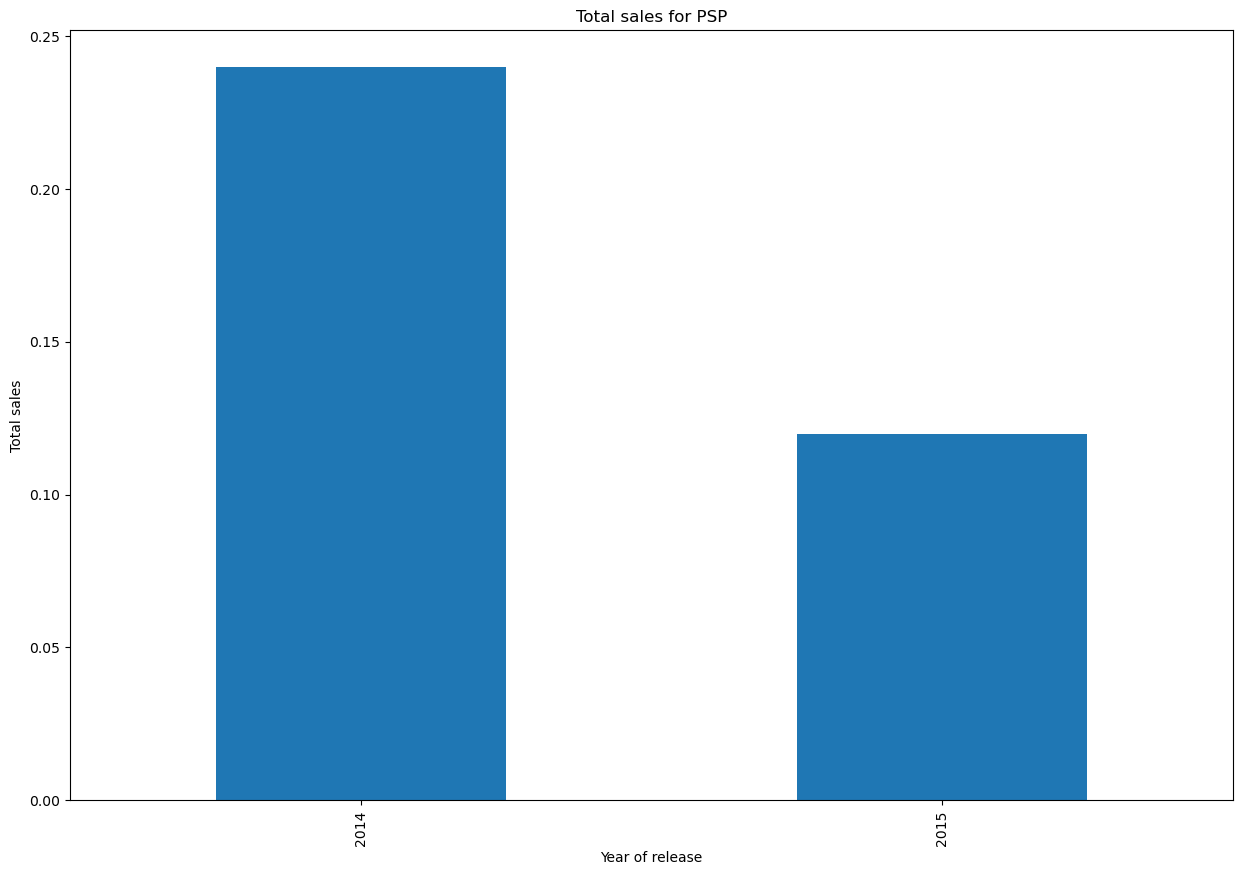

In [30]:
# Obtener los nombres de plataforma para el segmento de datos 'grouped_sample'
platforms = grouped_sample.index

# Recorre cada nombre de plataforma, obtén los datos y grafica las ventas totales por año
for platform in platforms:
    sample_data[sample_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.legend().set_visible(False)
    plt.show()

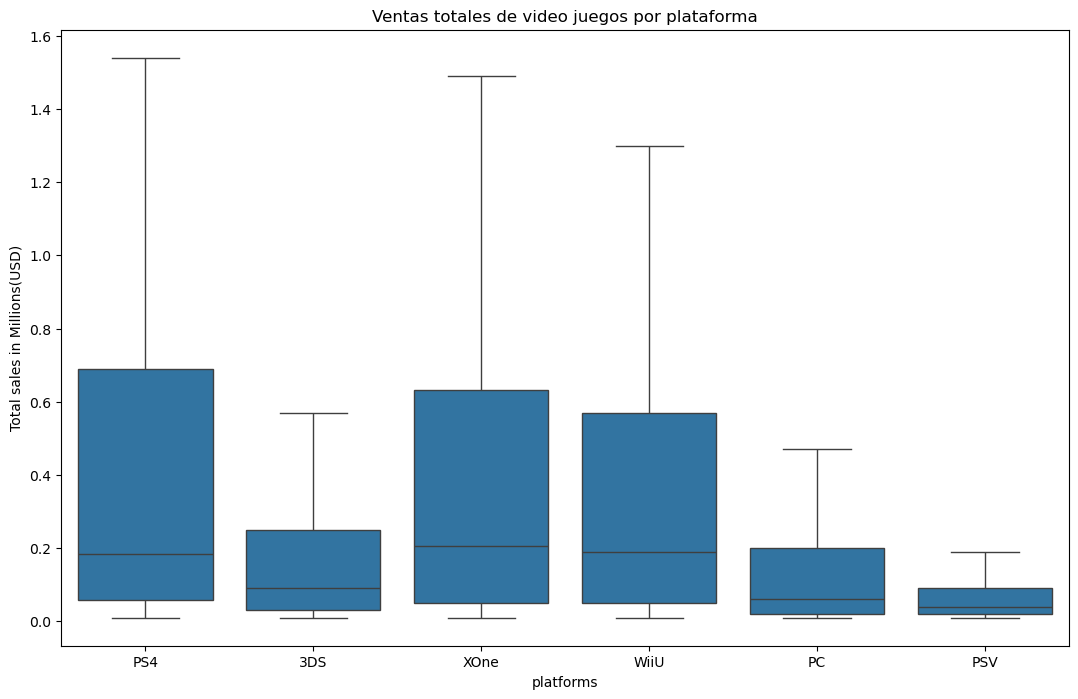

In [31]:
# Consulta las plataformas y grafica en un diagrama de caja sin eliminar valores atípicos
data = sample_data.query('platform in ["PS4", "XOne", "PC", "3DS", "WiiU", "PSV"]')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'total_sales', x= 'platform', showfliers=False)
 .set(title = 'Ventas totales de video juegos por plataforma', xlabel = 'platforms', ylabel = 'Total sales in Millions(USD)'))
plt.show()

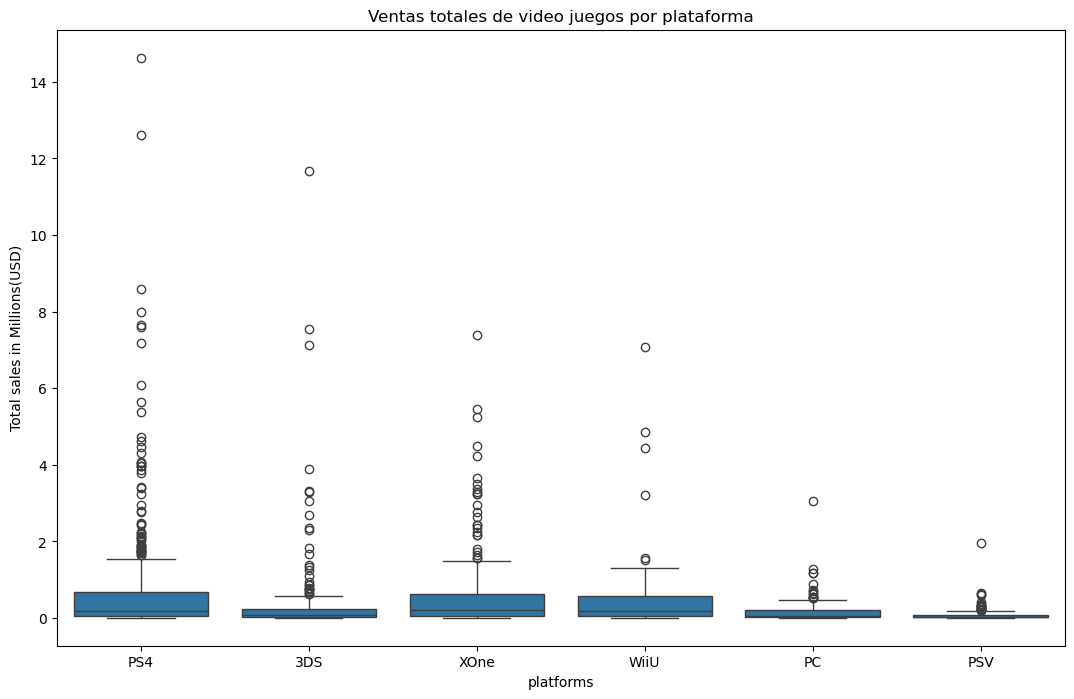

In [32]:
# Consulta las plataformas y grafica en un diagrama de caja sin eliminar valores atípicos
data = sample_data.query('platform in ["PS4", "XOne", "PC", "3DS", "WiiU", "PSV"]')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'total_sales', x= 'platform')
 .set(title = 'Ventas totales de video juegos por plataforma', xlabel = 'platforms', ylabel = 'Total sales in Millions(USD)'))
plt.show()

In [33]:
# Crea una lista de platafromas y muestrala
platforms = ['PS4', 'XOne', 'PC', '3DS', 'WiiU', 'PSV']

# Calcula e imprime el promedio de ventas por video juego de cada plataforma
for platform in platforms:
    average_sales = games.query('platform ==@platform')['total_sales'].mean()
    print(f'Ventas globales promedio por {platform} is {round(average_sales,2)}')
    

Ventas globales promedio por PS4 is 0.8
Ventas globales promedio por XOne is 0.65
Ventas globales promedio por PC is 0.27
Ventas globales promedio por 3DS is 0.5
Ventas globales promedio por WiiU is 0.56
Ventas globales promedio por PSV is 0.13


# User score afecta en las ventas totales

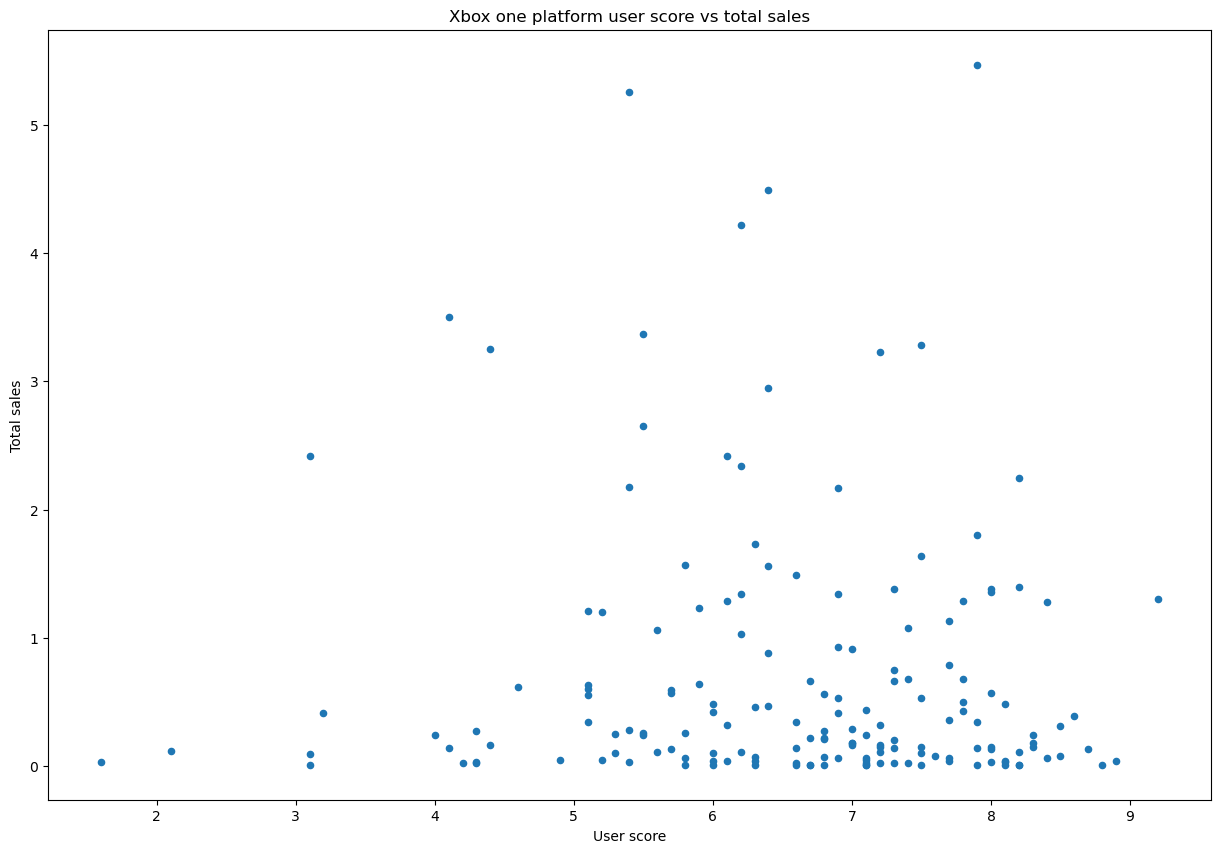

-0.07038392806475816

In [34]:
# Xbox one platform user vs ventas totales
sample_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox one platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

# Calcula la correlación entre user_score y total_sales
sample_data.query('platform == "XOne"')['user_score'].corr(games.query('platform == "XOne"')['total_sales'])


# Xbox one critic score afecta las ventas totales

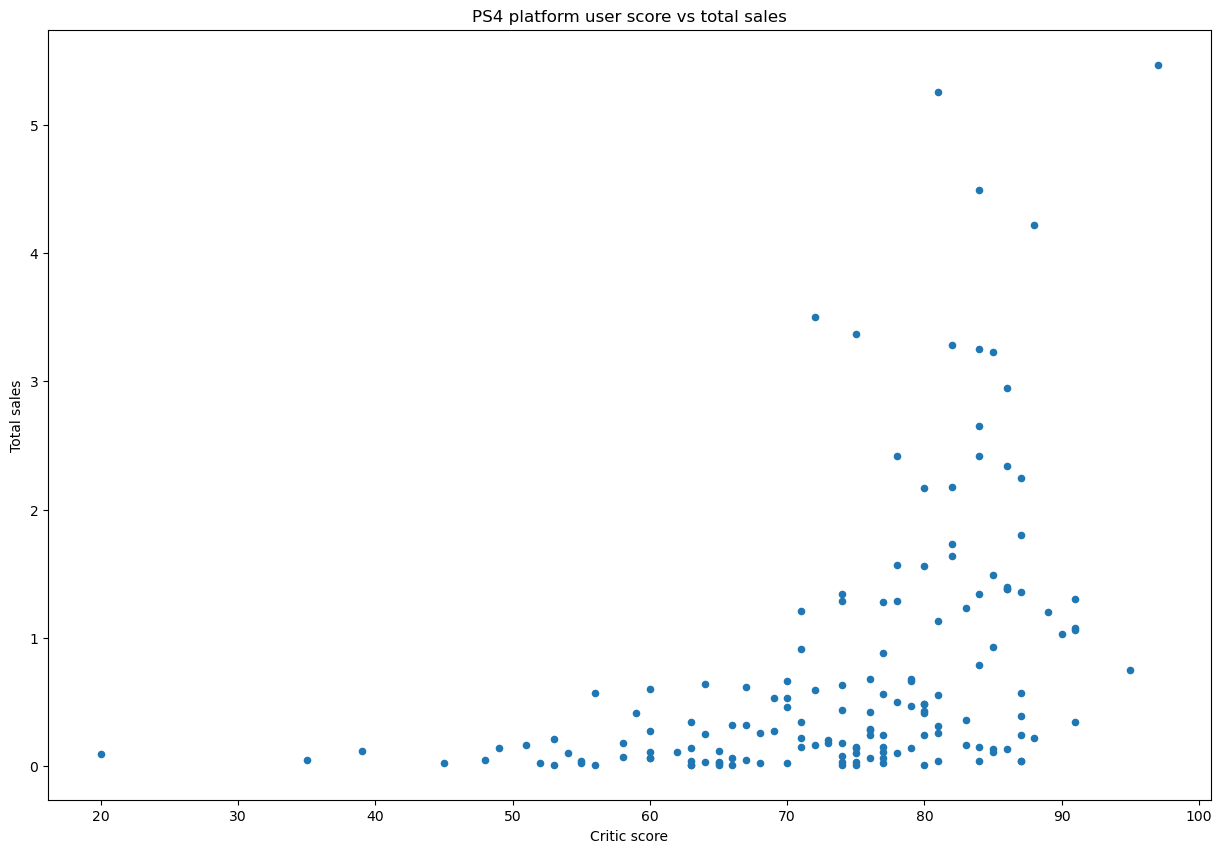

0.42867694370333187

In [35]:
# Xbox one platform critic vs ventas totales
sample_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform user score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

# Calcula la correlación entre critic_score y total_sales
sample_data.query('platform == "XOne"')['critic_score'].corr(games.query('platform == "XOne"')['total_sales'])


# PS4 user score afecta las ventas totales

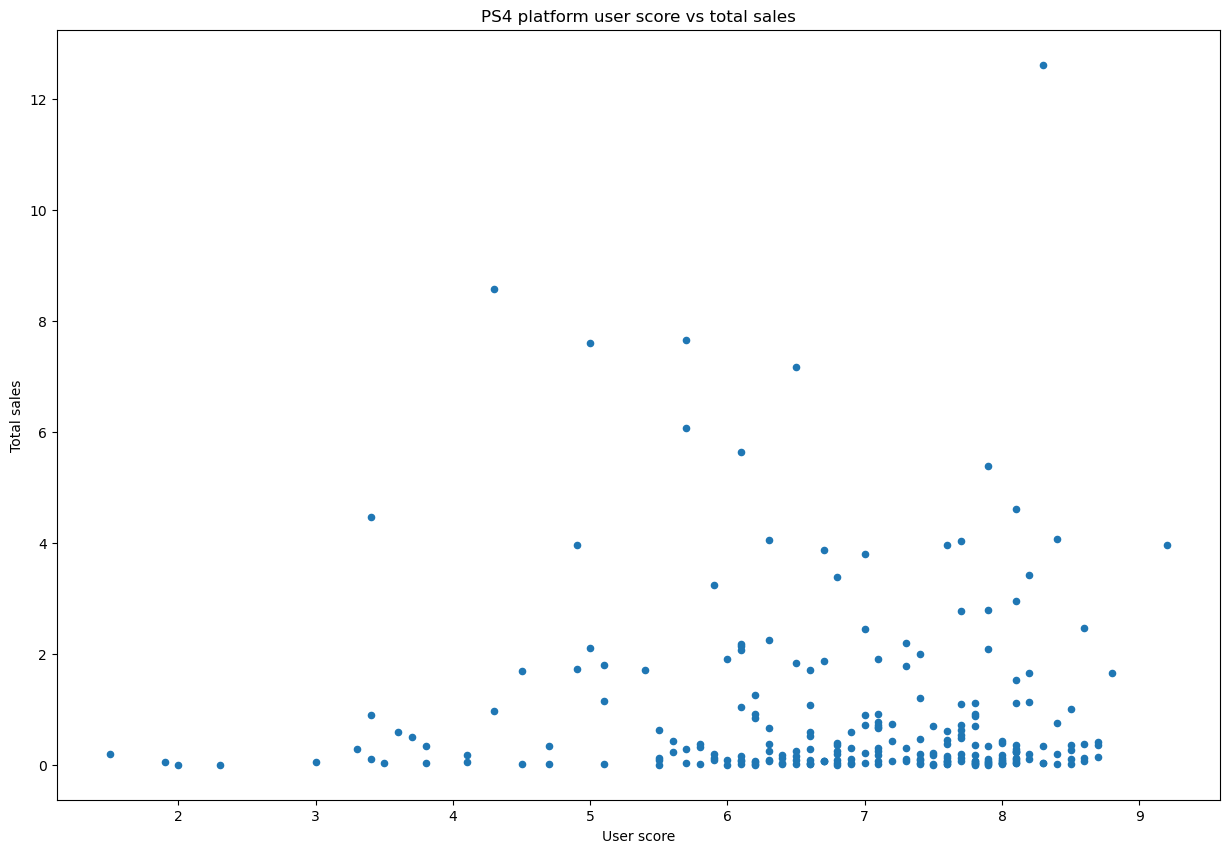

-0.04013158947269733

In [36]:
# PS4 platform user vs ventas totales
sample_data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform user score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

# Calcula la correlación entre user_score y total_sales
sample_data.query('platform == "PS4"')['user_score'].corr(games.query('platform == "PS4"')['total_sales'])


# PS4 platform critic score vs total sales

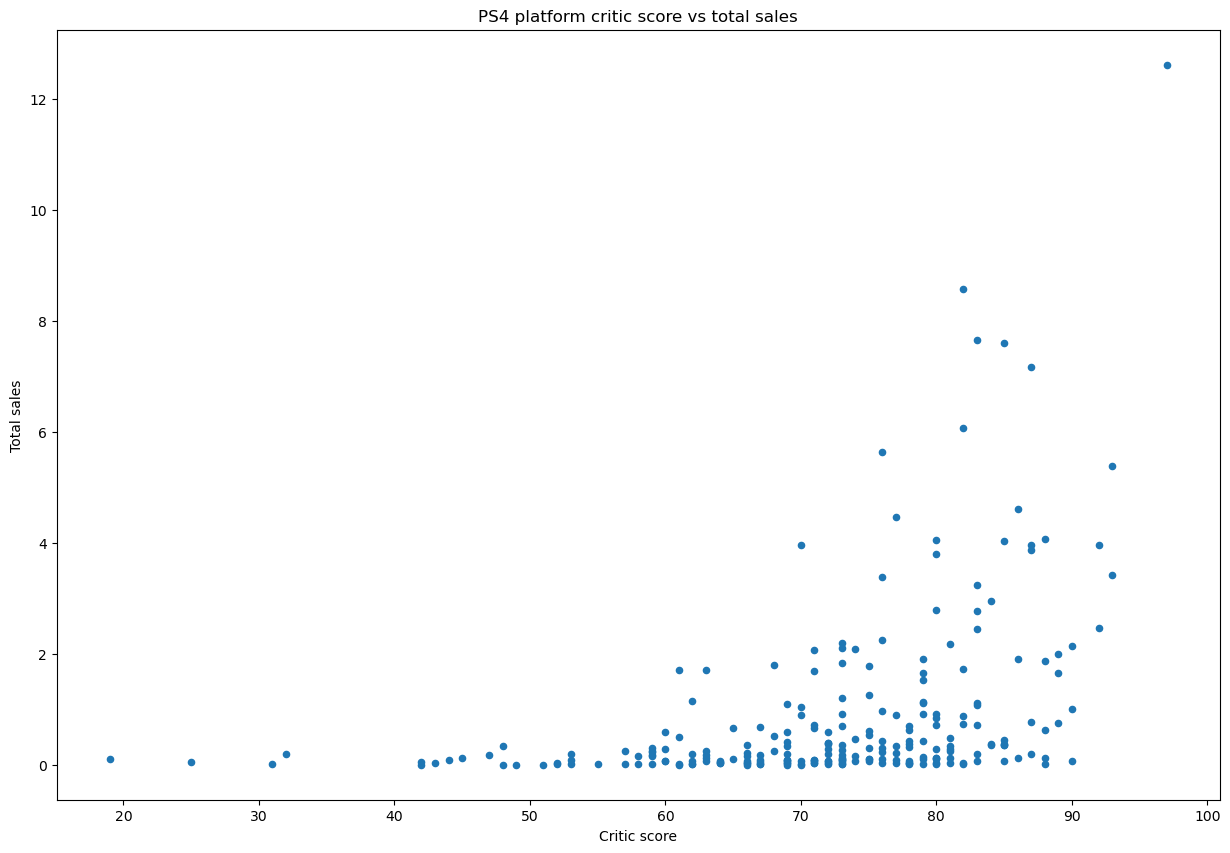

0.4026614106810412

In [37]:
# PS4 platform critic score vs ventas totales
sample_data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

# Calcula la correlación entre critic_score y total_sales
sample_data.query('platform == "PS4"')['critic_score'].corr(games.query('platform == "PS4"')['total_sales'])


# WiiU user score afecta en las ventas totales

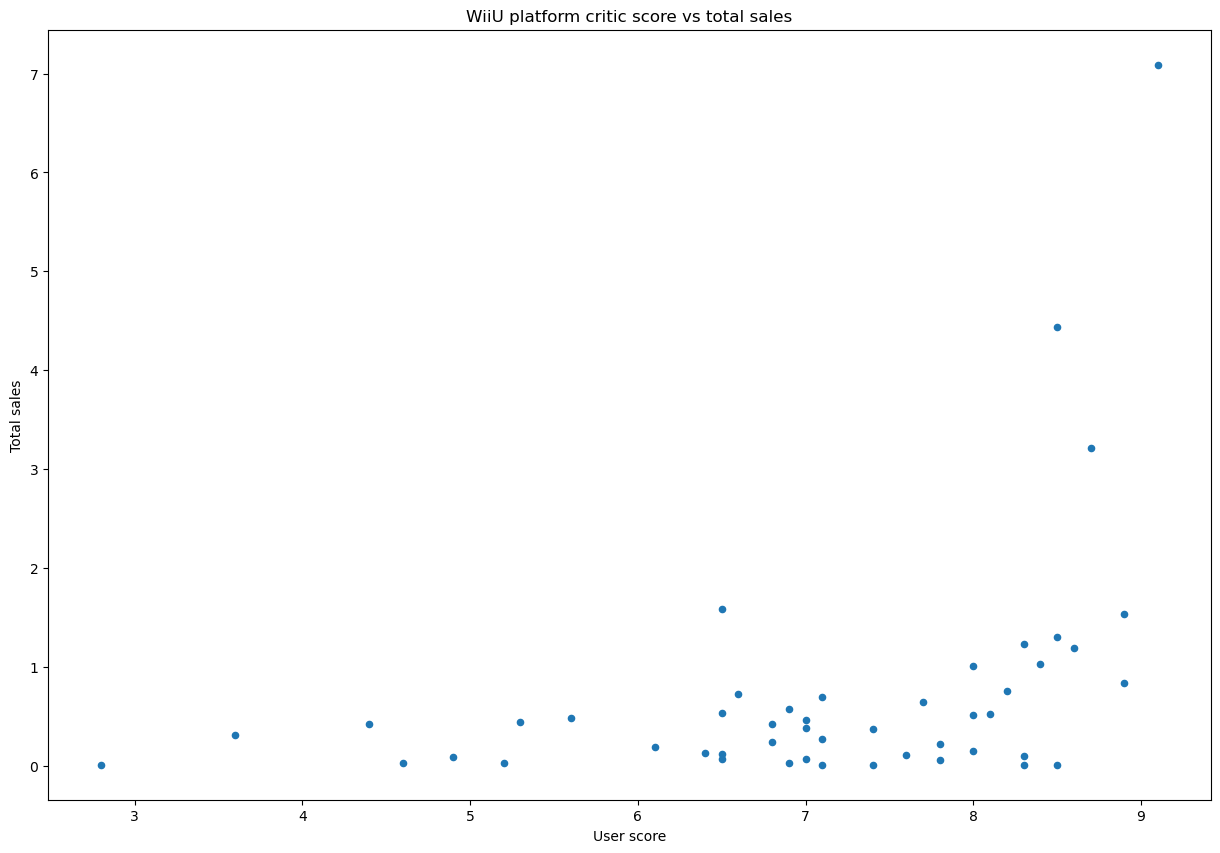

0.40792645792170784

In [38]:
# WiiU puntuación de la critica vs ventas totales
sample_data.query('platform == "WiiU"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('WiiU platform critic score vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

# Calcula la correlación entre user_score y total_sales
sample_data.query('platform == "WiiU"')['user_score'].corr(games.query('platform == "WiiU"')['total_sales'])


# Representación gráfica de las ventas totales de video juegos por género

# Como el critic score afecta en el WiiU sobre las ventas totales

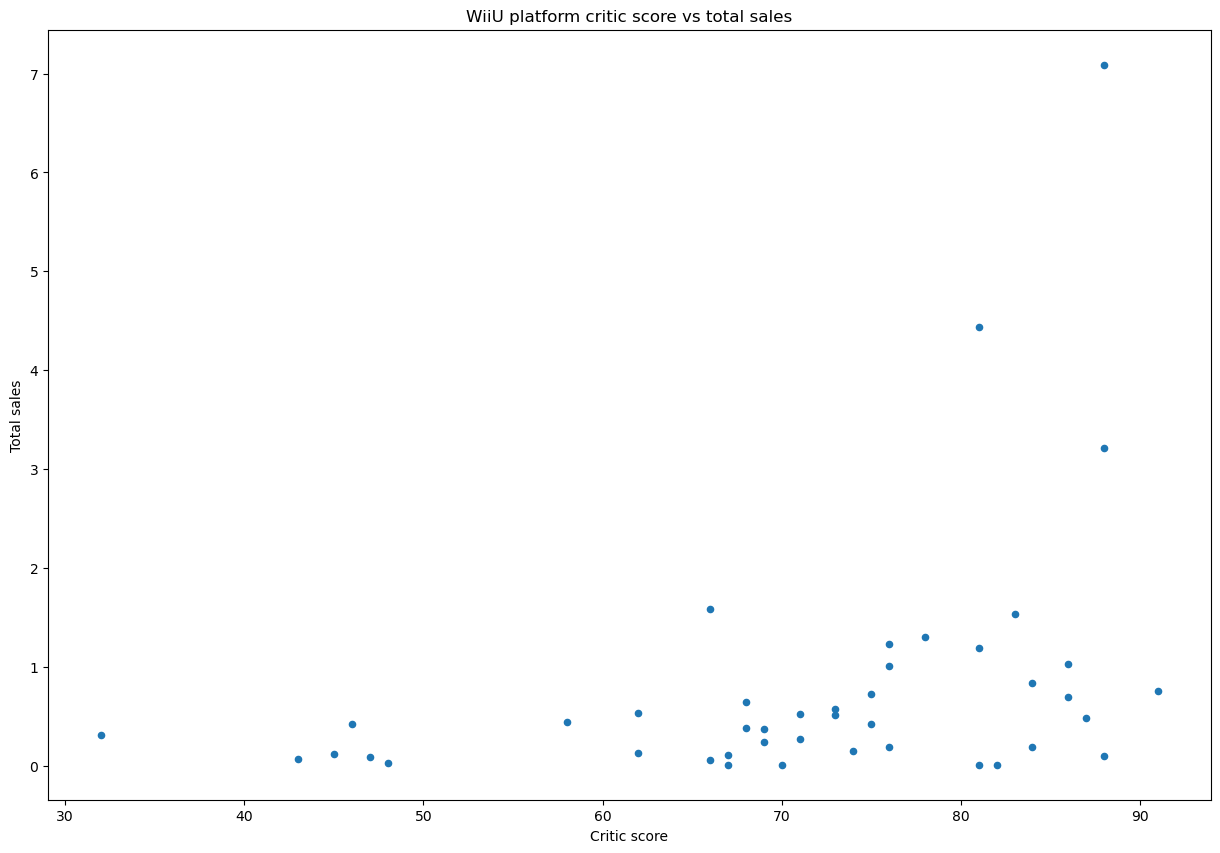

0.370201412480884

In [39]:
# WiiU puntuación de la critica vs ventas totales
sample_data.query('platform == "WiiU"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('WiiU platform critic score vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

# Calcula la correlación entre critic_score y total_sales
sample_data.query('platform == "WiiU"')['critic_score'].corr(games.query('platform == "WiiU"')['total_sales'])


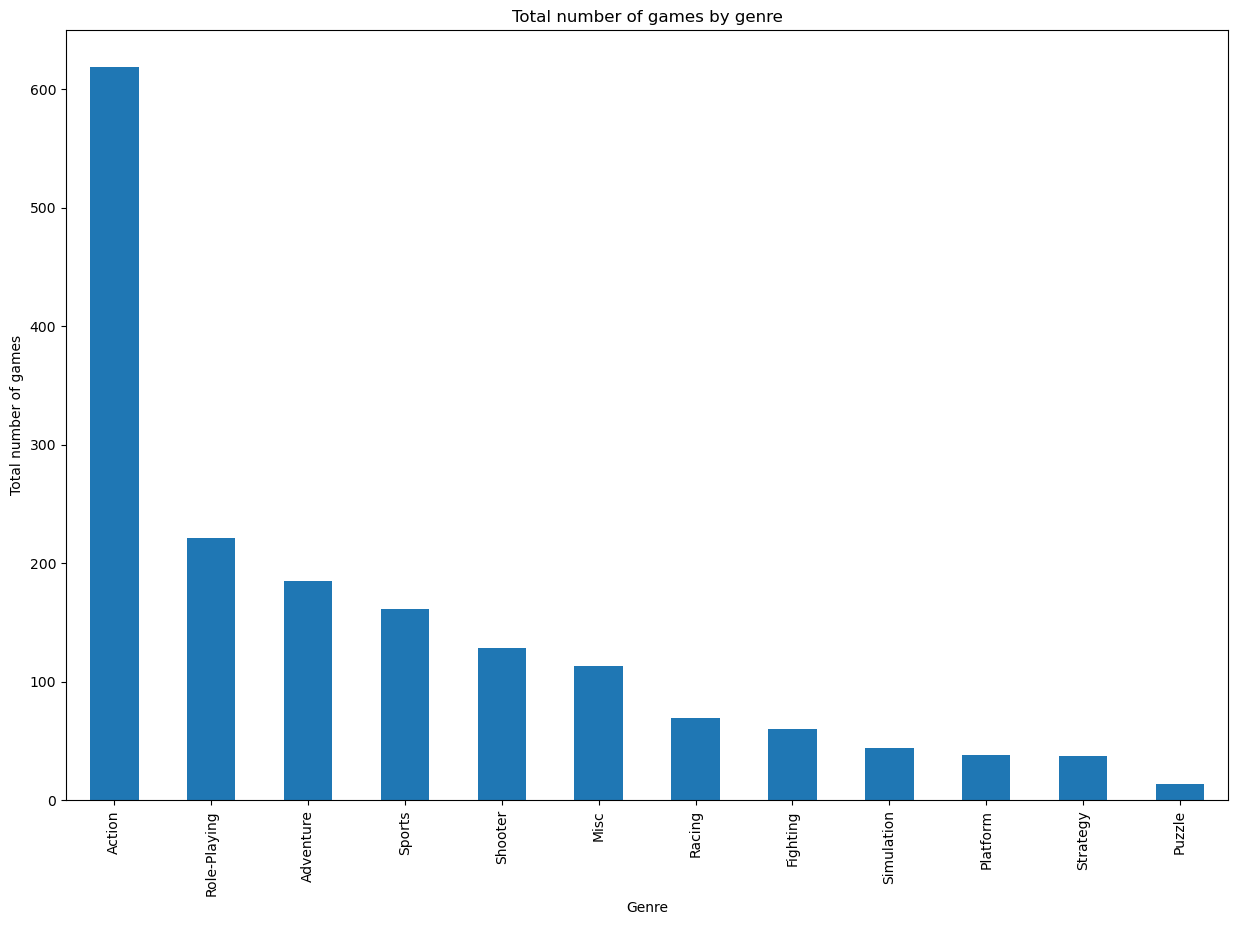

In [40]:
# Traza una gráfica de barras mostrando el total de video juegos por género
sample_data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.title('Total number of games by genre')
plt.xlabel('Genre')
plt.ylabel('Total number of games')
plt.show()

# Representación gráfica de las ventas totales medias por género

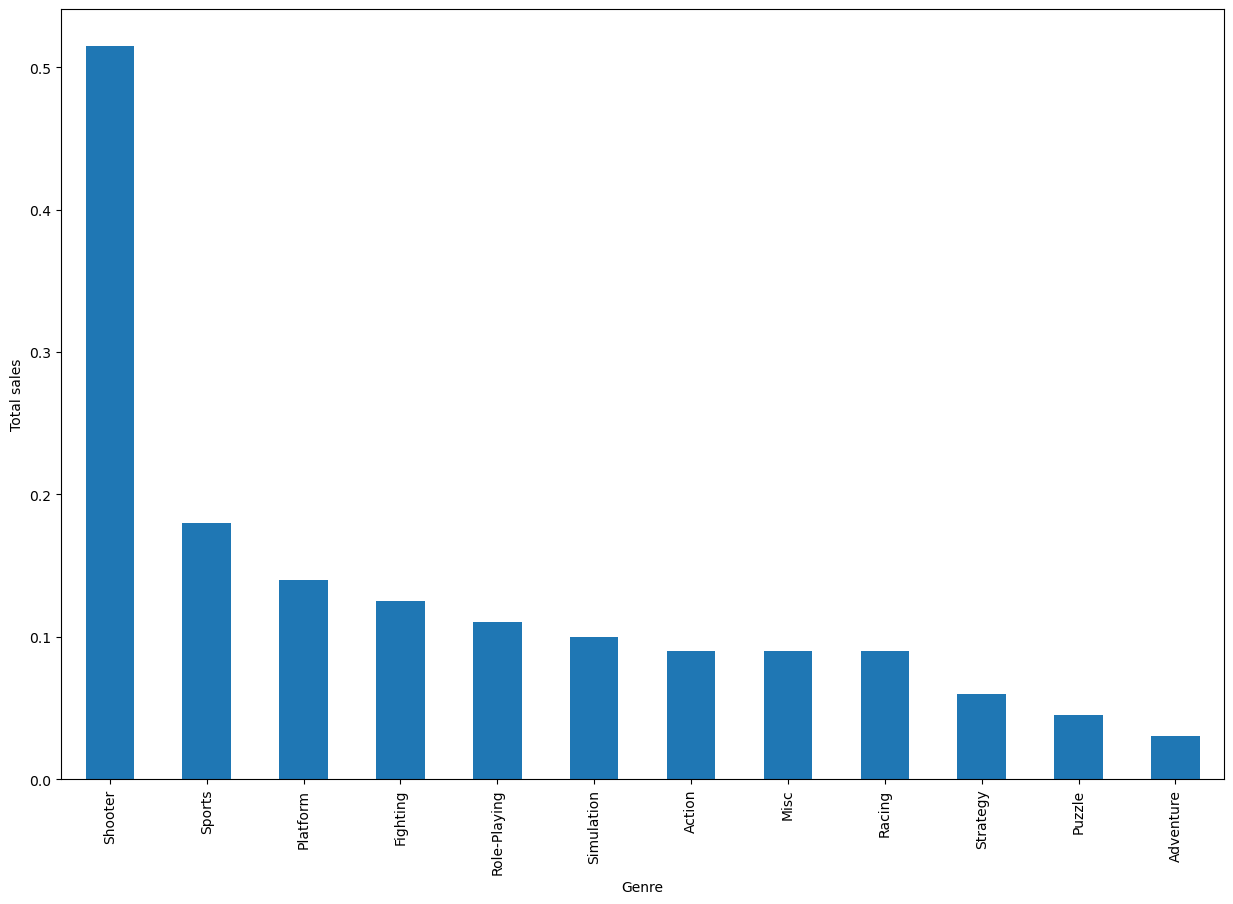

In [41]:
# Traza una grafica de barras mostrando el total de ventas por género
sample_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.show()

In [42]:
# Calcula la correlación entre la mediana global de las ventas y cuantos juegos hay en cada género 
sample_data.groupby('genre')['total_sales'].median().corr(games.groupby('genre')['name'].count())


0.062057865600651525

# Ventas NA por Plataforma

In [43]:
# Grupo de datos por plataforma, suma las ventas por región, clasifica por 'na_sales' en orden descendente.
grouped_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


In [44]:
groupby_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


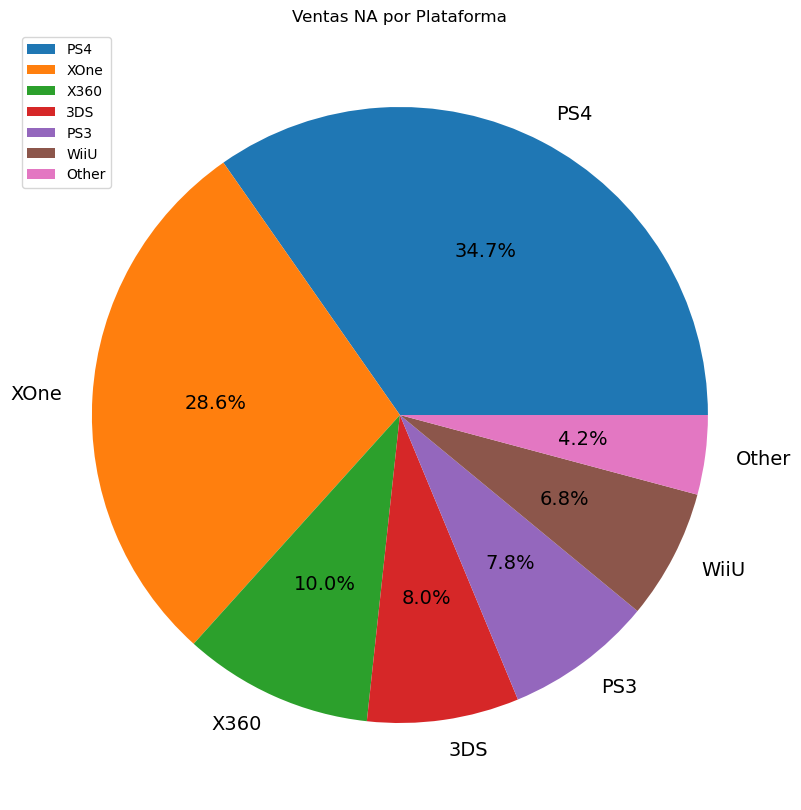

In [45]:
df_platform = sample_data.loc[:, ['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
                         .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()


plotted_platforms = df_platform['na_sales'].sort_values(ascending=False)[:6] 

other_platforms = df_platform['na_sales'].sort_values(ascending=False)[6:].sum()


plotted_platforms.loc['Other'] = other_platforms

plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas NA por Plataforma')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas EU por Plataforma

In [46]:
groupby_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
groupby_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
PS3,22.05,25.54,11.22
PC,7.23,17.97,0.00
3DS,22.64,16.12,44.24


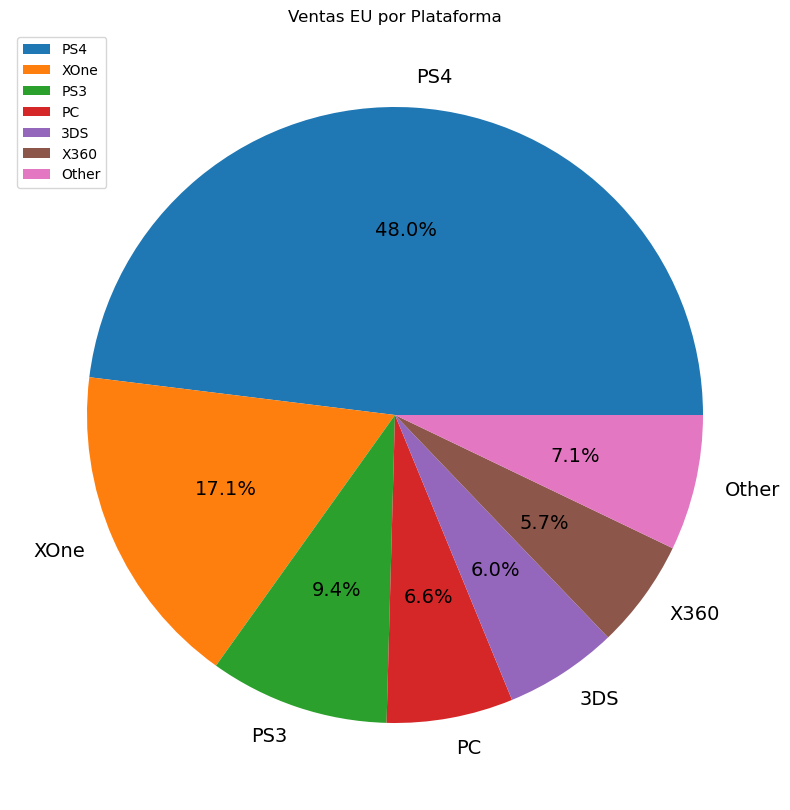

In [47]:
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
                         .groupby('platform')[['na_sales','eu_sales', 'jp_sales']].sum()

plotted_platforms = df_platform['eu_sales'].sort_values(ascending=False)[:6]

other_platforms = df_platform['eu_sales'].sort_values(ascending=False)[6:].sum()

plotted_platforms.loc['Other'] = other_platforms

plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas EU por Plataforma')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas JP por Plataforma

In [48]:
groupby_sample = sample_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


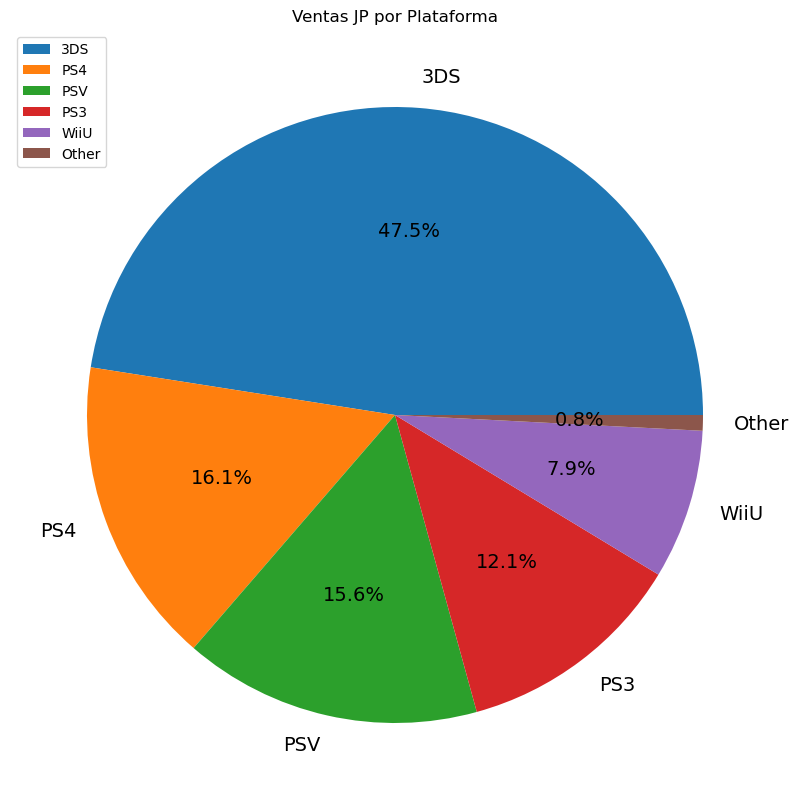

In [49]:
df_platform = sample_data.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('platform')[['na_sales','eu_sales', 'jp_sales']].sum()

plotted_platforms = df_platform['jp_sales'].sort_values(ascending=False)[:5]

other_platforms = df_platform['jp_sales'].sort_values(ascending=False)[5:].sum()

plotted_platforms.loc['Other'] = other_platforms

plotted_platforms.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas JP por Plataforma')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas NA por Género

In [50]:
grouped_sample = sample_data.groupby('genre')[['na_sales','eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Misc,15.05,12.86,5.61


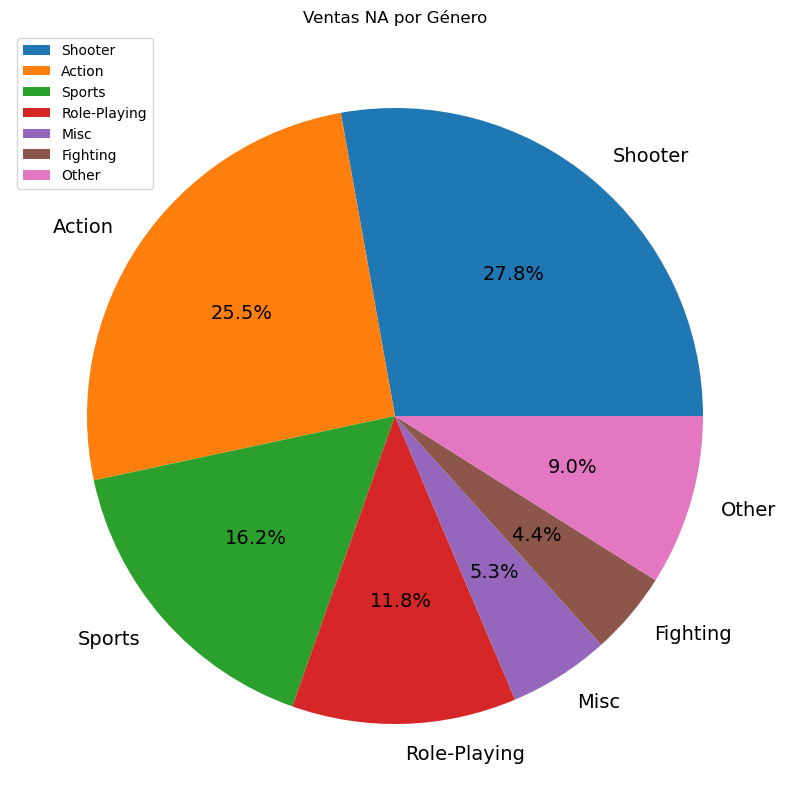

In [51]:
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plotted_genres = df_genre['na_sales'].sort_values(ascending=False)[:6]

other_genres = df_genre['na_sales'].sort_values(ascending=False)[6:].sum()

plotted_genres.loc['Other'] = other_genres

plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas NA por Género')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas EU por Género

In [52]:
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Shooter,79.02,65.52,4.87
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Racing,8.74,14.13,1.76


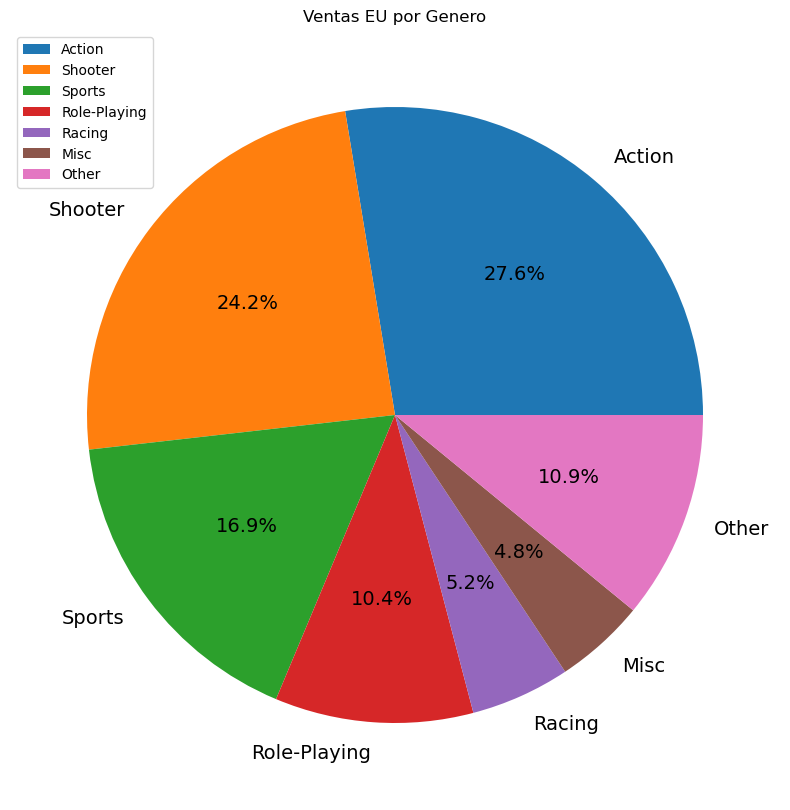

In [53]:
df_genre = sample_data.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales', 'jp_sales']]\
                      .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plotted_genres = df_genre['eu_sales'].sort_values(ascending=False)[:6]

other_genres = df_genre['eu_sales'].sort_values(ascending=False)[6:].sum()

plotted_genres.loc['Other'] = other_genres

plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas EU por Genero')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()
                                             

# Ventas JP por Genero

In [54]:
grouped_sample = sample_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,33.47,28.17,31.16
Action,72.53,74.68,29.58
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Shooter,79.02,65.52,4.87


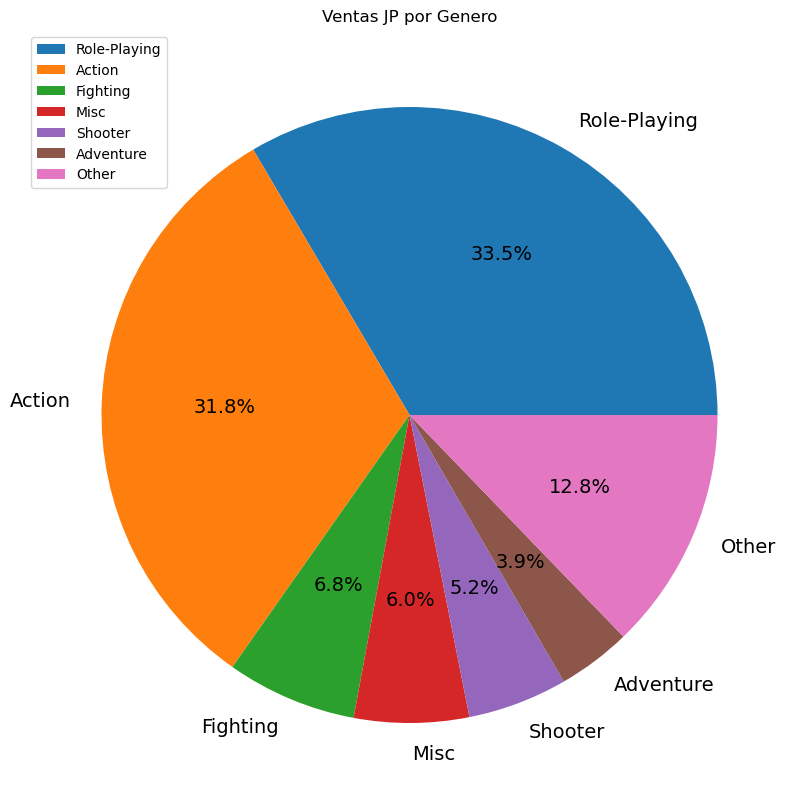

In [55]:
df_genre = sample_data.loc [:,['genre', 'na_sales','eu_sales', 'jp_sales']]\
                       .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plotted_genres = df_genre['jp_sales'].sort_values(ascending=False)[:6]

other_genres = df_genre['jp_sales'].sort_values(ascending=False)[6:].sum()

plotted_genres.loc['Other'] = other_genres

plotted_genres.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas JP por Genero')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas NA por ESRB

In [56]:
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


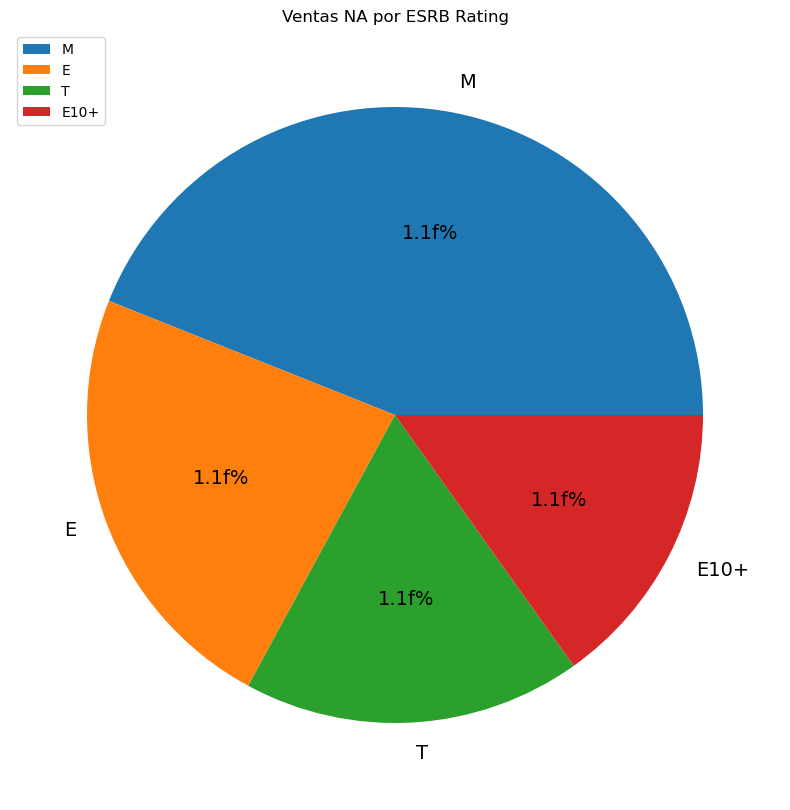

In [57]:
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
                       .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plotted_rating = df_rating['na_sales'].sort_values(ascending=False)[:]

plotted_rating.plot(kind='pie', autopct='1.1f%%', fontsize=14, figsize=(10,10), title='Ventas NA por ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas EU por ESRB

In [58]:
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


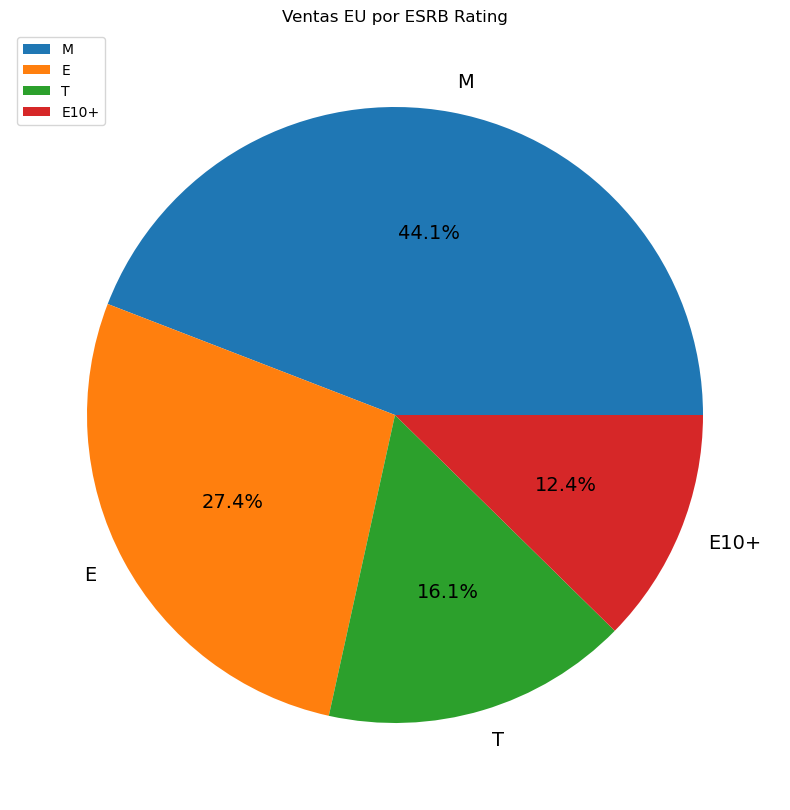

In [59]:
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
                        .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plotted_rating = df_rating['eu_sales'].sort_values(ascending=False)[:]

plotted_rating.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas EU por ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()

# Ventas JP por ESRB

In [60]:
grouped_sample = sample_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='jp_sales', ascending=False)[0:5]
grouped_sample

,na_sales,eu_sales,jp_sales
rating,,,
T,38.95,34.07,14.78
E,50.74,58.06,8.94
M,96.42,93.44,8.01
E10+,33.23,26.16,4.46


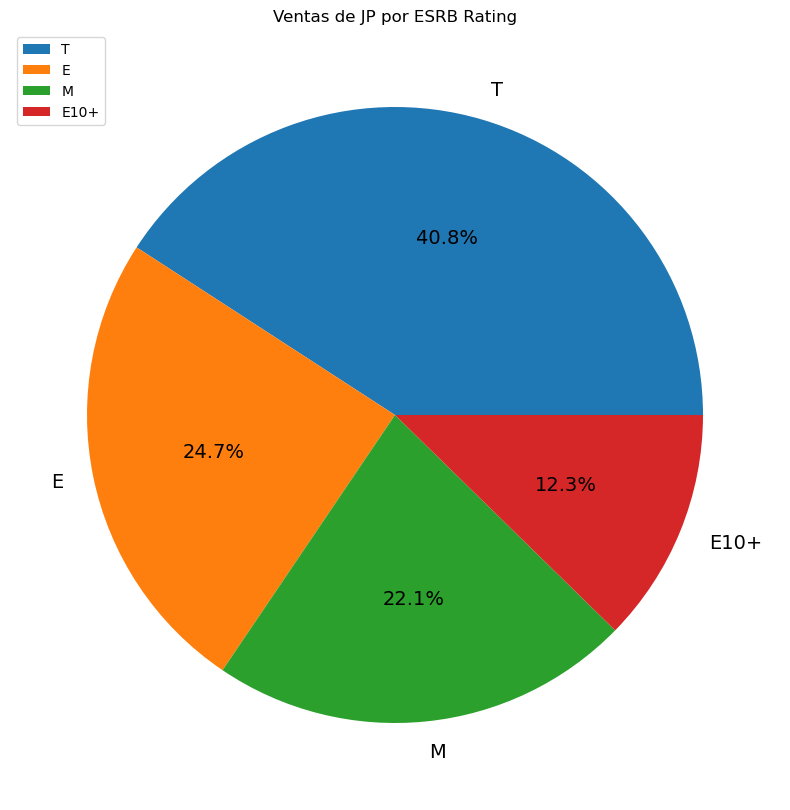

In [61]:
df_rating = sample_data.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
                       .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plotted_rating = df_rating['jp_sales'].sort_values(ascending=False)[:]

plotted_rating.plot(kind='pie', autopct='%1.1f%%', fontsize=14, figsize=(10,10), title='Ventas de JP por ESRB Rating')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()


In [62]:
from scipy import stats as st

# Test de Hipotesis

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


# Primer test: Por plataforma

H0: Las calificaciónes promedio de los usuarios para las plataformas Xbox One y PC son iguales.
HA: Las calificaciónes promedio de los usuarios para las plataformas acción y deportes son distintas.

Vamos a contrastar con un nivel de significancia de $\alpha$ 0.05
vamos a contrastar dos **categorias** (XOne y PC) con respecto a una variable numerica (*user_score*), además desconoces las desviación estándar reales. el test más adecuado  será el t-test.

In [63]:
games = pd.DataFrame({
    'platform': ['PS4', 'XOne', 'Switch', 'PC'],
    'year': [2016, 2017, 2018, 2019],
    'sales': ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    'user_score': [8.2, 7.5, 9.1, 8.8]
})
games_filtrado = games[games['year'] > 2016]

plataformas_unicas = games_filtrado.platform.unique()
print(plataformas_unicas)

['XOne' 'Switch' 'PC']


In [64]:
score_xone = games_filtrado[games_filtrado['platform'] == 'XOne']['user_score'].dropna()
score_pc = games_filtrado[games_filtrado['platform'] == 'PC']['user_score'].dropna()

In [65]:
from scipy.stats import levene

In [66]:
alpha = 0.05

_, pvalor_levene = levene(score_xone, score_pc)



if pvalor_levene < alpha:
    print('Rechazamos la hipotesis nula, las varianzas son distintas')
    equalVar = False
else:
    print('No rechazamos la hipotesis nula, las varianzas son iguales ')
    equalVar = True

No rechazamos la hipotesis nula, las varianzas son iguales 


c:\Users\ISRAELMARIANA\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


H0: Las varianzas de los usuarios para las plataformas Xbox One y PC son iguales.
HA: Las varianzas de los usuarios para las plataformas acción y deportes son distintas.

Vamos a contrastar con un nivel de significancia de $\alpha$ 0.05

In [67]:
alpha = 0.05

_, pvalor =ttest_ind(score_xone, score_pc, equal_var = equalVar)
print(f"""
    La clasificación promedio de profesionales para la Xbox es: {score_xone.mean()}
    La clasificación promedio de profesionales para  la PC es: {score_pc.mean()}
    
    p-value: {pvalor}
""")

if pvalor < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')


    La clasificación promedio de profesionales para la Xbox es: 7.5
    La clasificación promedio de profesionales para  la PC es: 8.8
    
    p-value: nan

No rechazamos la hipotesis nula


c:\Users\ISRAELMARIANA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


# Conclusión

Mi estimado revisor de código que gusto tenerlo aquí revisando mi proyecto 6. Concluyo el proyecto haciendo un comentario referente a que yo soy un gamer desde el 2004 cuando mi padre me regaló un PS1 en mi cumpleaños no.6, de ahí ha ido creciendo mi amor y enfoque a los video juegos al punto de darme cuenta que nuestra propia realidad y existencia humana es un video juego espectacular donde tengo un avatar el cual es capaz de tomar decisiones a voluntad propia y hacerse conciente de que debe ser responsable al actuar y avanzar en cada día a dia en este plano terrenal.

Mé di cuenta como las ventas de cada plataforma durante el año 2016 y 2017 fluctuan bastante, ya que fueron años decisivos para la incorporación y desarrollo de la generación de nuevas plataformas que dió inicio en el 2014 con el lanzamiento del PS4 y XboxOne como lideres en la lista de plataformas.
Hoy presento un proyecto detallado y revisado por mi en cada linea de código, no carga desde el dataset que razón?, pero así me sucedió con el proyecto 5 que envié y fue aprobado, a mi no me cargó, pero a usted revisor vaya que sin pero alguno le funcionará, estoy confiado que así será de nuevo en esta ocasión. Tenga excelente día y que gusto que disfrute mucho de su trabajo. Abrazo y cuidese mucho.